# **Preeclampsia Risk Prediction using MLP Networks**

<p>Vamos a usar le modelo que aparece en el estudio <a href= "https://www.kaggle.com/code/muhammadasifwazir/preeclampsia-risk-prediction-using-mlp"> "Preeclampsia Risk Prediction using MLP Networks"</a>.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
train_df = pd.read_excel('train_dataset.xlsx')
test_df = pd.read_excel('test_dataset.xlsx')

### Cambio nombre columnas

In [6]:
train_df.columns

Index(['gravida', 'parity', 'gestational age (weeks)', 'Age (yrs)',
       'BMI  [kg/m²]', 'diabetes', 'History of hypertension (y/n)',
       'Systolic BP', 'Diastolic BP', 'HB', 'fetal weight(kgs)',
       'Protien Uria', 'Unnamed: 12',
       'Uterine Artery Doppler Resistance Index (RI)',
       ' Uterine Artery Doppler Pulsatility Index (PI',
       'amniotic fluid levels(cm)', 'Risk_level'],
      dtype='object')

In [8]:
# Rnombramos
train_df.rename(columns={'BMI  [kg/m²]': 'BMI_kg/m²'}, inplace=True)
test_df.rename(columns={'BMI  [kg/m²]': 'BMI_kg/m²'}, inplace=True)
#train_df.rename(columns={'Systolic Blood Pressure [mm Hg]': 'Systolic_Blood_Pressure_mmHg'}, inplace=True)
#test_df.rename(columns={'Systolic Blood Pressure [mm Hg]': 'Systolic_Blood_Pressure_mmHg'}, inplace=True)

# PREPROCESAMIENTO DEL DATASET

Empezamos a mirar en el dataset de entrenamiento

In [12]:
train_df.head()

,gravida,parity,gestational age (weeks),Age (yrs),BMI_kg/m²,diabetes,History of hypertension (y/n),Systolic BP,Diastolic BP,HB,fetal weight(kgs),Protien Uria,Unnamed: 12,Uterine Artery Doppler Resistance Index (RI),Uterine Artery Doppler Pulsatility Index (PI,amniotic fluid levels(cm),Risk_level
0,4,2,26.0,22,17.2,1,0,130,80,8.5,0.6320,0,NaN,NaN,NaN,10.0,mid
1,3,3,30.0,29,21.2,0,0,110,60,8.3,0.9840,0,NaN,NaN,NaN,9.5,low
2,7,4,26.2,35,31.2,0,0,110,60,10.8,0.0076,0,NaN,NaN,NaN,14.2,mid
3,3,1,22.2,25,21.0,0,0,110,70,9.3,0.5010,0,NaN,NaN,NaN,10.0,low
4,1,0,22.1,24,26.8,1,0,120,80,8.0,0.4090,1,NaN,NaN,NaN,9.6,mid


In [14]:
print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)

Training Data Shape: (162, 17)
Testing Data Shape: (41, 17)


In [16]:
train_df.describe()

,gravida,parity,gestational age (weeks),Age (yrs),BMI_kg/m²,diabetes,History of hypertension (y/n),Systolic BP,Diastolic BP,HB,fetal weight(kgs),Protien Uria,Unnamed: 12,Uterine Artery Doppler Resistance Index (RI),Uterine Artery Doppler Pulsatility Index (PI,amniotic fluid levels(cm)
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,0.0,0.0,0.0,161.000000
mean,2.932099,1.265432,26.359259,24.901235,24.982716,0.277778,0.191358,113.703704,71.049383,9.574074,0.921401,0.135802,NaN,NaN,NaN,11.063540
std,1.564857,1.102190,5.665210,4.028177,6.059125,0.449292,0.394590,11.027289,8.605070,0.826243,1.489103,0.343641,NaN,NaN,NaN,2.541924
min,1.000000,0.000000,14.000000,18.000000,16.400000,0.000000,0.000000,90.000000,20.000000,8.000000,0.000100,0.000000,NaN,NaN,NaN,4.790000
25%,2.000000,0.000000,22.200000,22.000000,21.000000,0.000000,0.000000,110.000000,70.000000,9.025000,0.115000,0.000000,NaN,NaN,NaN,10.000000
50%,3.000000,1.000000,26.000000,25.000000,23.250000,0.000000,0.000000,110.000000,70.000000,9.300000,0.501000,0.000000,NaN,NaN,NaN,10.000000
75%,4.000000,2.000000,29.500000,26.000000,29.475000,1.000000,0.000000,120.000000,80.000000,10.300000,0.875000,0.000000,NaN,NaN,NaN,13.000000
max,8.000000,6.000000,40.000000,38.000000,43.300000,1.000000,1.000000,130.000000,90.000000,11.200000,9.550000,1.000000,NaN,NaN,NaN,18.000000


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   gravida                                        162 non-null    int64  
 1   parity                                         162 non-null    int64  
 2   gestational age (weeks)                        162 non-null    float64
 3   Age (yrs)                                      162 non-null    int64  
 4   BMI_kg/m²                                      162 non-null    float64
 5   diabetes                                       162 non-null    int64  
 6   History of hypertension (y/n)                  162 non-null    int64  
 7   Systolic BP                                    162 non-null    int64  
 8   Diastolic BP                                   162 non-null    int64  
 9   HB                                             162 non

In [20]:
train_df.columns

Index(['gravida', 'parity', 'gestational age (weeks)', 'Age (yrs)',
       'BMI_kg/m²', 'diabetes', 'History of hypertension (y/n)', 'Systolic BP',
       'Diastolic BP', 'HB', 'fetal weight(kgs)', 'Protien Uria',
       'Unnamed: 12', 'Uterine Artery Doppler Resistance Index (RI)',
       ' Uterine Artery Doppler Pulsatility Index (PI',
       'amniotic fluid levels(cm)', 'Risk_level'],
      dtype='object')

In [22]:
train_df.isnull().sum()

gravida                                            0
parity                                             0
gestational age (weeks)                            0
Age (yrs)                                          0
BMI_kg/m²                                          0
diabetes                                           0
History of hypertension (y/n)                      0
Systolic BP                                        0
Diastolic BP                                       0
HB                                                 0
fetal weight(kgs)                                  0
Protien Uria                                       0
Unnamed: 12                                      162
Uterine Artery Doppler Resistance Index (RI)     162
 Uterine Artery Doppler Pulsatility Index (PI    162
amniotic fluid levels(cm)                          1
Risk_level                                         0
dtype: int64

In [24]:
test_df.isnull().sum()

gravida                                           0
parity                                            0
gestational age (weeks)                           0
Age (yrs)                                         0
BMI_kg/m²                                         0
diabetes                                          0
History of hypertension (y/n)                     0
Systolic BP                                       0
Diastolic BP                                      0
HB                                                1
fetal weight(kgs)                                 0
Protien Uria                                      0
Unnamed: 12                                      41
Uterine Artery Doppler Resistance Index (RI)     41
 Uterine Artery Doppler Pulsatility Index (PI    41
amniotic fluid levels(cm)                         0
Risk_level                                        0
dtype: int64

## **Eliminamos columnas innecesarias**

Unnamed: 12 , Uterine Artery Doppler Resistance Index (RI) y Uterine Artery Doppler Pulsatility Index (PI) son la columnas que vamos a eliminar  porque no nos interesan en el algoritmo, además que tienen muchos valores faltanes. 

In [28]:

train_df.drop(["Unnamed: 12","Uterine Artery Doppler Resistance Index (RI)"," Uterine Artery Doppler Pulsatility Index (PI"], axis = 1, inplace = True)

In [30]:
test_df.drop(["Unnamed: 12","Uterine Artery Doppler Resistance Index (RI)"," Uterine Artery Doppler Pulsatility Index (PI"], axis = 1, inplace = True)

In [32]:
train_df.isnull().sum()

gravida                          0
parity                           0
gestational age (weeks)          0
Age (yrs)                        0
BMI_kg/m²                        0
diabetes                         0
History of hypertension (y/n)    0
Systolic BP                      0
Diastolic BP                     0
HB                               0
fetal weight(kgs)                0
Protien Uria                     0
amniotic fluid levels(cm)        1
Risk_level                       0
dtype: int64

Seguimos buscando valores nulos en le resto de las columnas

In [35]:
test_df[test_df['HB'].isna()]

,gravida,parity,gestational age (weeks),Age (yrs),BMI_kg/m²,diabetes,History of hypertension (y/n),Systolic BP,Diastolic BP,HB,fetal weight(kgs),Protien Uria,amniotic fluid levels(cm),Risk_level
17,2,1,29.0,27,29.4,0,0,100,60,NaN,0.871,0,14.6,low


In [37]:
#Rellenamos el valor con el promedio
mean_HB = test_df['HB'].mean()
# Fill the null values in the 'HB' column with the mean value
test_df['HB'] = test_df['HB'].fillna(mean_HB)

In [39]:
train_df[train_df['amniotic fluid levels(cm)'].isna()]

,gravida,parity,gestational age (weeks),Age (yrs),BMI_kg/m²,diabetes,History of hypertension (y/n),Systolic BP,Diastolic BP,HB,fetal weight(kgs),Protien Uria,amniotic fluid levels(cm),Risk_level
73,5,4,14.0,32,20.0,0,0,100,90,11.2,0.075,0,NaN,low


In [41]:
#Hcamos lo mismo patra esta columna
mean_amniotic_fluid_levels = train_df['amniotic fluid levels(cm)'].mean()
train_df['amniotic fluid levels(cm)'] = train_df['amniotic fluid levels(cm)'].fillna(mean_amniotic_fluid_levels)

Combinamos los datasets de test y entrenamiento

In [44]:
data = pd.concat([test_df, train_df], ignore_index=True)

In [46]:
data.shape

(203, 14)

In [48]:
data.describe()

,gravida,parity,gestational age (weeks),Age (yrs),BMI_kg/m²,diabetes,History of hypertension (y/n),Systolic BP,Diastolic BP,HB,fetal weight(kgs),Protien Uria,amniotic fluid levels(cm)
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,2.906404,1.261084,26.456158,25.167488,24.881773,0.266010,0.182266,113.694581,71.034483,9.580825,0.870041,0.147783,11.165042
std,1.504485,1.060456,5.527653,4.112469,5.851327,0.442962,0.387018,11.019574,8.349648,0.809765,1.362040,0.355762,2.494514
min,1.000000,0.000000,14.000000,18.000000,16.400000,0.000000,0.000000,90.000000,20.000000,8.000000,0.000100,0.000000,4.790000
25%,2.000000,0.000000,22.200000,22.000000,21.000000,0.000000,0.000000,110.000000,70.000000,9.150000,0.269000,0.000000,10.000000
50%,3.000000,1.000000,26.000000,25.000000,23.100000,0.000000,0.000000,110.000000,70.000000,9.300000,0.501000,0.000000,10.000000
75%,4.000000,2.000000,29.300000,27.000000,29.450000,1.000000,0.000000,120.000000,80.000000,10.300000,0.827500,0.000000,13.150000
max,8.000000,6.000000,40.000000,38.000000,43.300000,1.000000,1.000000,130.000000,90.000000,11.200000,9.550000,1.000000,18.000000


# **CARACTERÍSTICAS DE INTERÉS A USAR**

- Age
- BMI
- Systolic Blood Pressure
- Diastolic Blood Pressure
- Risk Level: Target variable with 3 classes.

# **DESCRIPCIÓN GRÁFICA DEL DATASET**

## 1. Histogramas de distribución de variables

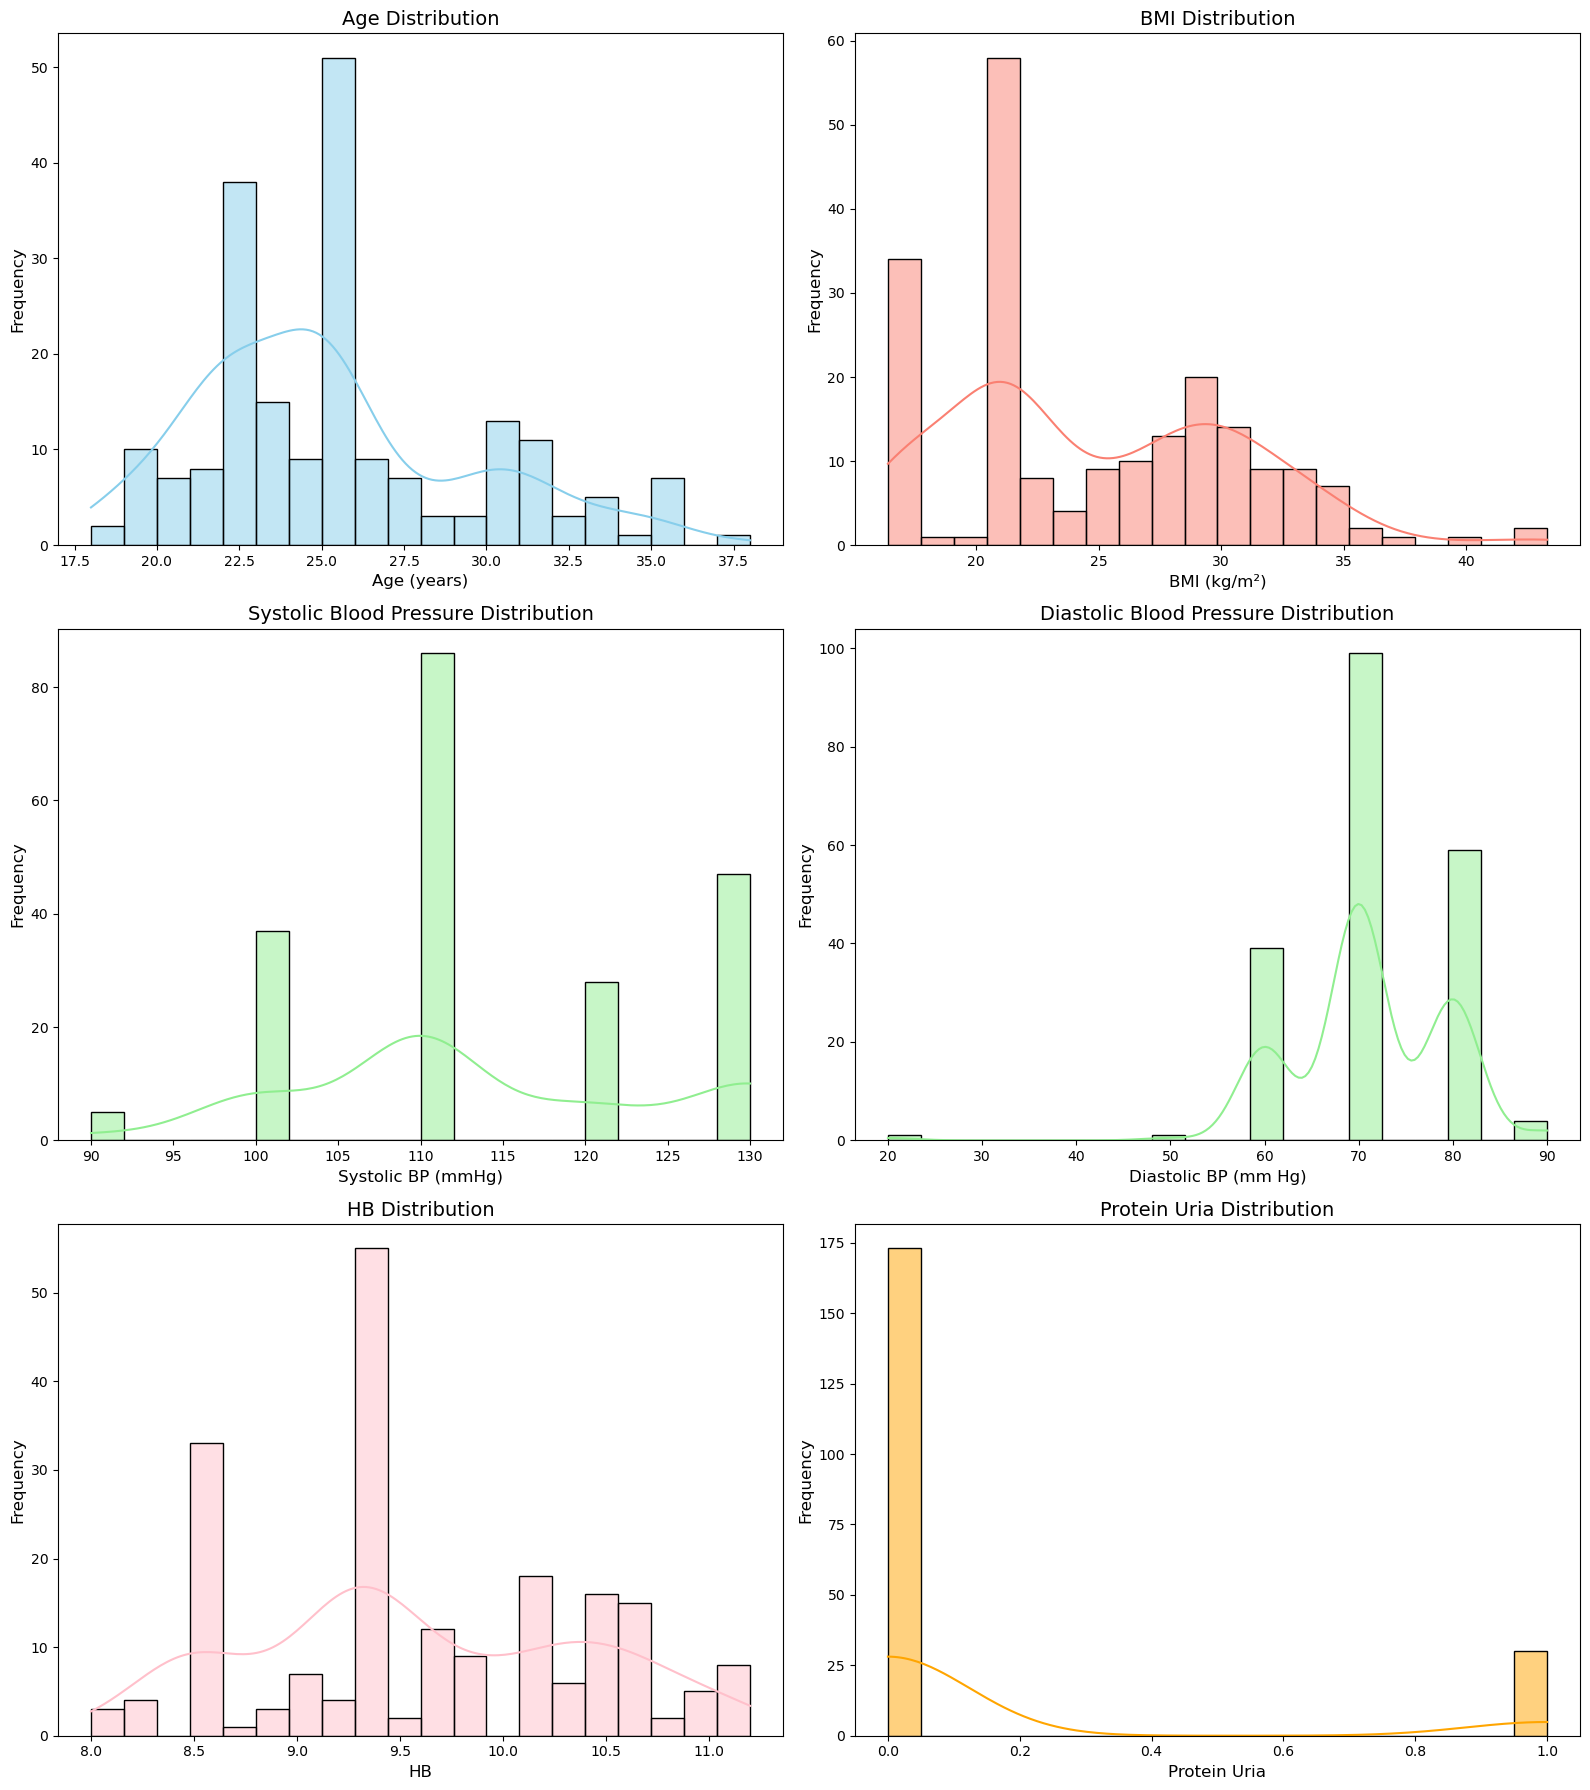

In [52]:
# Creating the combined visualizations in one frame with modifications for better representation
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plot 1: Age Distribution
sns.histplot(data['Age (yrs)'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].set_xlabel('Age (years)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Plot 2: BMI Distribution
sns.histplot(data['BMI_kg/m²'], bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('BMI Distribution', fontsize=14)
axes[0, 1].set_xlabel('BMI (kg/m²)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Plot 3: Systolic Blood Pressure Distribution
sns.histplot(data['Systolic BP'], bins=20, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Systolic Blood Pressure Distribution', fontsize=14)
axes[1, 0].set_xlabel('Systolic BP (mmHg)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Plot 4: Diastolic Blood Pressure Distribution

sns.histplot(data['Diastolic BP'], bins=20, kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Diastolic Blood Pressure Distribution', fontsize=14)
axes[1, 1].set_xlabel('Diastolic BP (mm Hg)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Plot 5: HB Distribution

sns.histplot(data['HB'], bins=20, kde=True, ax=axes[2, 0], color='pink')
axes[2, 0].set_title('HB Distribution', fontsize=14)
axes[2, 0].set_xlabel('HB', fontsize=12)
axes[2, 0].set_ylabel('Frequency', fontsize=12)

# Plot 6: Protein Uria Distribution

sns.histplot(data['Protien Uria'], bins=20, kde=True, ax=axes[2, 1], color='orange')
axes[2, 1].set_title('Protein Uria Distribution', fontsize=14)
axes[2, 1].set_xlabel('Protein Uria', fontsize=12)
axes[2, 1].set_ylabel('Frequency', fontsize=12)


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


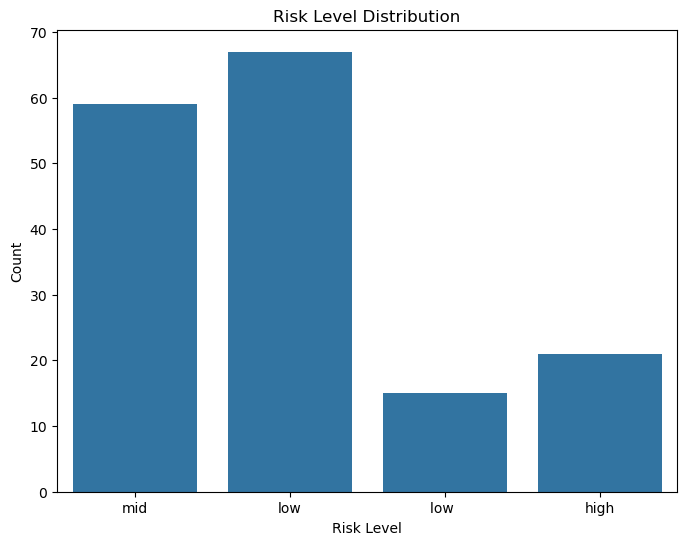

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(x='Risk_level', data=train_df)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

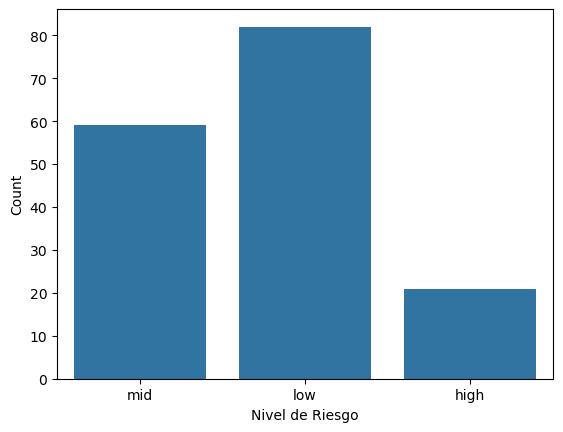

In [56]:
import matplotlib.pyplot as plt
train_df['Risk_level'] = train_df['Risk_level'].str.strip().str.lower() #elimina espacios y convierte a minúsculas
train_df['Risk_level'] = train_df['Risk_level'].replace({'low':'low'}) #unificamos nombre
sns.countplot(x='Risk_level', data = train_df)
plt.ylabel('Count')
plt.xlabel('Nivel de Riesgo')
plt.show()


Hay 2 valores de Risk_level etiquetados como "low", así, vamos a hacer que en vez de 4 etiquetas haya 3. 

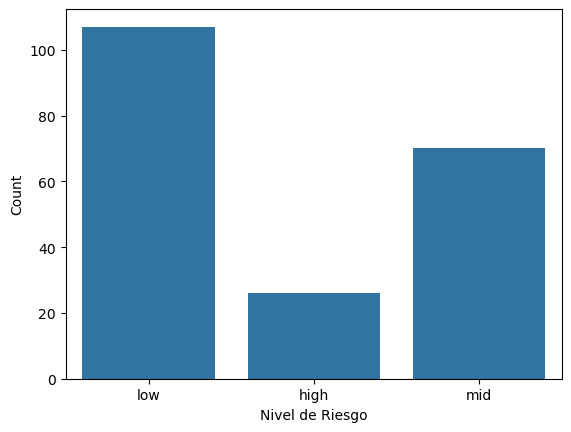

In [59]:
import matplotlib.pyplot as plt
data['Risk_level'] = data['Risk_level'].str.strip().str.lower() #elimina espacios y convierte a minúsculas
data['Risk_level'] = data['Risk_level'].replace({'low':'low'}) #unificamos nombre
sns.countplot(x='Risk_level', data = data)
plt.ylabel('Count')
plt.xlabel('Nivel de Riesgo')
plt.show()


Como podems observar, la mayoriía de las pacientes tienen bajo riesgo, y es algo que podríamos esperar, porque en el gráfico de la distribución de la edad, observamos un pico muy alto entre los 22.5 y 25 años, que son las mujeres con menos riesgo en teoría. Por el lado malo, nuestro modelo quedará sesgado para este caso. 

In [62]:
data.columns

Index(['gravida', 'parity', 'gestational age (weeks)', 'Age (yrs)',
       'BMI_kg/m²', 'diabetes', 'History of hypertension (y/n)', 'Systolic BP',
       'Diastolic BP', 'HB', 'fetal weight(kgs)', 'Protien Uria',
       'amniotic fluid levels(cm)', 'Risk_level'],
      dtype='object')

## Correlación entre variables

IMC VS PRESIÓN ARTERIAL

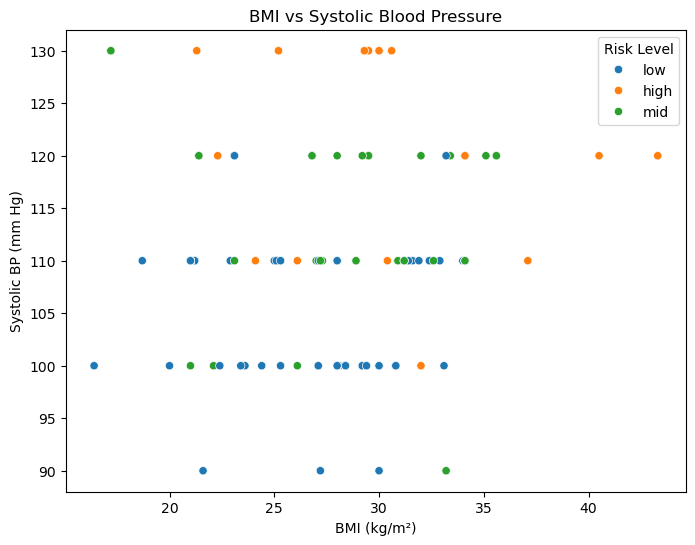

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI_kg/m²', y='Systolic BP', hue='Risk_level', data=data)
plt.title('BMI vs Systolic Blood Pressure')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Systolic BP (mm Hg)')
plt.legend(title='Risk Level')
plt.show()


A mayor BMI, se observa un incremento en la presión arterial, lo que coincide con la mayor probabilidad de estar en categorías de riesgi medio o alto. 
Aun así, vemos un solapamiento entre las categorías de iresgo low y mid en pacientes con BMI entre 25 y 30 kg/m2 y presiones arteriales cercanas a 110 mmHg. Esto sugiere que las diferencias entre estos dos niveles de riesgo no son exclusivamente lineales y pueden depender de otros factores. 

EDAD VS PRESIÓN ARTERIAL

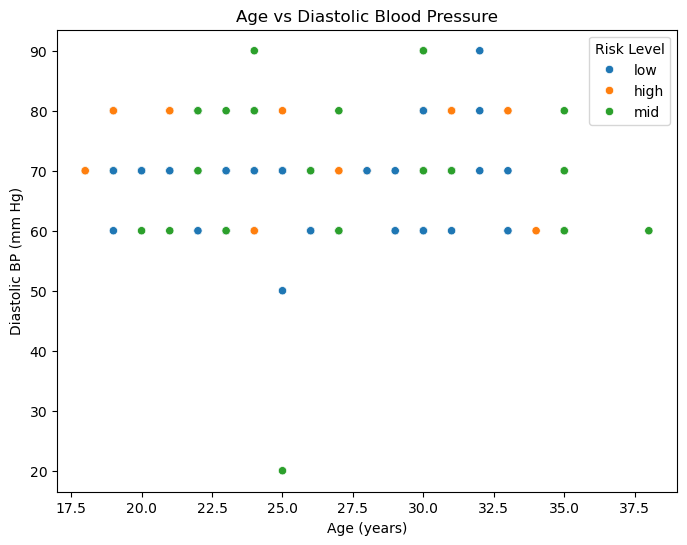

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age (yrs)', y='Diastolic BP', hue='Risk_level', data=data)
plt.title('Age vs Diastolic Blood Pressure')
plt.xlabel('Age (years)')
plt.ylabel('Diastolic BP (mm Hg)')
plt.legend(title='Risk Level')
plt.show()

La edad no parece ser un factor diferenciador directo por los niveles de riesgo. Por si sola no da información de si hay riesgo de desarrollar preeclampsia. 

3. Box Plots
Age Box Plot

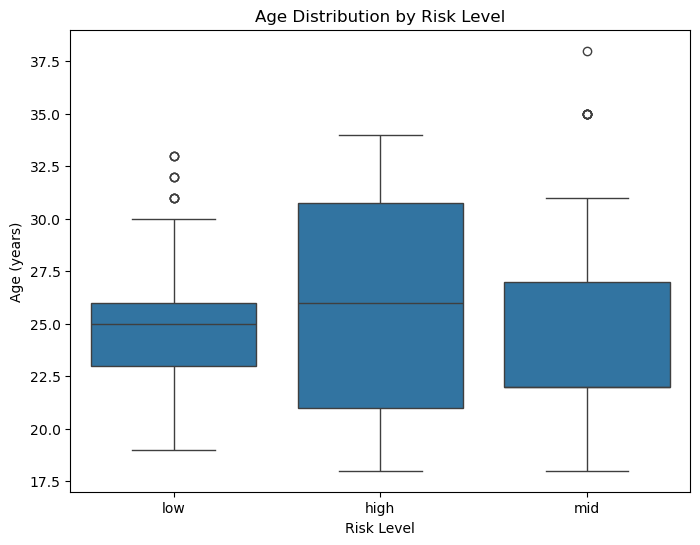

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Risk_level', y='Age (yrs)', data=data)
plt.title('Age Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age (years)')
plt.show()

Pese al anterior gráfico, que nos daba poca infor5mación sobre la distribución de la edad por las categorías de riesgo, 
en este gráfico parece que la edad parace influir en el nivel de riesgo. Con pacientes mayores más propensas a tener un riesgo alto de padeceer preeclampsia. Si embargo, hay valores atípicos en las categorías de riesgo bajo y medio, que sugieren que la edad no es un factor único para determinar el riesgo. 

BMI Box Plot

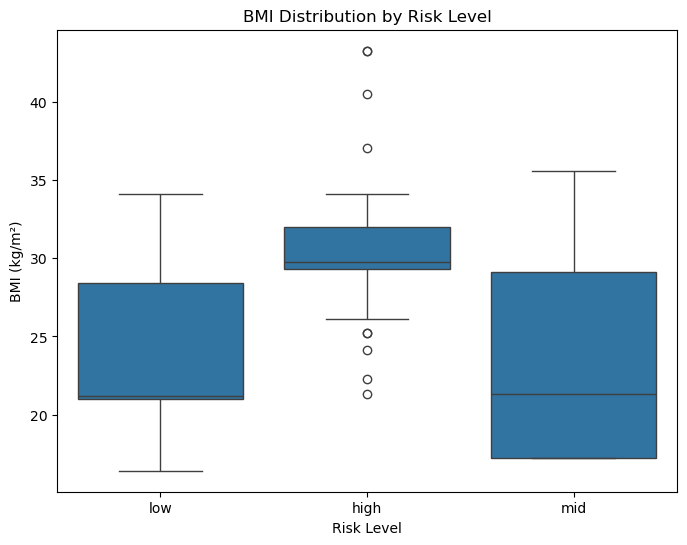

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Risk_level', y='BMI_kg/m²', data=data)
plt.title('BMI Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('BMI (kg/m²)')
plt.show()

Aúnque en el grafico de dispersión habíamos notado que el BMI es un factor determinante para el nivel de riesgo, esta gráfica lo vuelve a confirmar, que un BMI más alto se asocia con un riesgo mayor , aunque la variabilidad de cada categoría nos sugiere que hay otros ffactotres que contribuyen a la evaluación del riesgo, pero el BMI sigue siendo un indicador importante. 

# 2: IMPLEMENTACIÓN MLP (PERCEPTRÓN MULTICAPA)
Es una red neuronal, tiene varias capas (neuronas) que van transformando la entrada hasta obetener el formato y las predicciones de interés en las variables de la salida. 

In [82]:
train_df.columns

Index(['gravida', 'parity', 'gestational age (weeks)', 'Age (yrs)',
       'BMI_kg/m²', 'diabetes', 'History of hypertension (y/n)', 'Systolic BP',
       'Diastolic BP', 'HB', 'fetal weight(kgs)', 'Protien Uria',
       'amniotic fluid levels(cm)', 'Risk_level'],
      dtype='object')

### Separating Features and Target

In [85]:
selected_features = [ "BMI_kg/m²", "Age (yrs)", "Systolic BP", "Diastolic BP", 'HB', 'Protien Uria' ]
X_train = train_df[selected_features]
X_test = test_df[selected_features]

#renombramos columnas
X_train.rename(columns={'BMI_kg/m²': 'BMI', 'Age (yrs)': 'Age', 'Protien Uria': 'Protein Uria', 'HB': 'Hemoglobin'}, inplace=True)
X_test.rename(columns={'BMI_kg/m²': 'BMI', 'Age (yrs)': 'Age', 'Protien Uria': 'Protein Uria', 'HB': 'Hemoglobin'}, inplace=True)

#Variable objetivo
y_train= train_df['Risk_level']
y_test = test_df['Risk_level']


C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_17044\3330266215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.rename(columns={'BMI_kg/m²': 'BMI', 'Age (yrs)': 'Age', 'Protien Uria': 'Protein Uria', 'HB': 'Hemoglobin'}, inplace=True)
C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_17044\3330266215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.rename(columns={'BMI_kg/m²': 'BMI', 'Age (yrs)': 'Age', 'Protien Uria': 'Protein Uria', 'HB': 'Hemoglobin'}, inplace=True)


In [87]:
X_train.shape

(162, 6)

In [89]:
X_test.shape

(41, 6)

In [91]:
from sklearn.preprocessing import StandardScaler
# Preprocesamiento: estandarización de las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Encoding Target Variable

In [94]:
from sklearn.preprocessing import LabelEncoder

#codificamos variable objetivo: risk level
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Para hacer una clasificación de 3 clases, usaos one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Building the MLP Model

### Importing Libraries

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### MODELO INICIAL PLANTEADO

##### ARQUITECTURA DE RED NEURONAL:
4 capas

4 neuronas por capa (parámetro a optimizar más tarde)

Función de Activación: ReLU

Optimizador: SGD

Tasa de aprendizaje: 0.001

Función de pérdida: Categorical Cross-Entropy

Métrica de validación: Accuracy (precisión)

In [100]:
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # 30% dropout
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
     Dense(y_train_categorical.shape[1], activation='softmax')
])

# Compiling the Model

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\virginia.anton\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the Model

In [103]:
history = model.fit(X_train_scaled, y_train_categorical,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2842 - loss: 1.0812 - val_accuracy: 0.4545 - val_loss: 1.1421
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4819 - loss: 1.0309 - val_accuracy: 0.4545 - val_loss: 1.0850
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5575 - loss: 0.9606 - val_accuracy: 0.6061 - val_loss: 1.0275
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6596 - loss: 0.9460 - val_accuracy: 0.6364 - val_loss: 0.9695
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7052 - loss: 0.8779 - val_accuracy: 0.6364 - val_loss: 0.9246
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7099 - loss: 0.8330 - val_accuracy: 0.6364 - val_loss: 0.8837
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7125 - loss: 0.8197 - val_accuracy: 0.6667 - val_loss: 0.8460
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8138 - loss: 0.7000 - val_accuracy: 0.6667 - val_loss:

### Evaluating the Model

In [106]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7274 - loss: 0.4910
Test Accuracy: 73.17%


In [108]:
y_pred_prob = model.predict(X_test_scaled)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [110]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        high       0.50      0.40      0.44         5
         low       1.00      0.76      0.86        25
         mid       0.50      0.82      0.62        11

    accuracy                           0.73        41
   macro avg       0.67      0.66      0.64        41
weighted avg       0.80      0.73      0.75        41



Aunque la accuracy sea 70.3%, la clase high tiene baja precisión (0.65%) y tiene un F1-score de 0.73 debido al bajo soporte (solo 5 ejemplos). La clase mid tiene un buen recall (1.00) pero baja precisión (0.65), lo que significa que el modelo predice demasiados falsos positivos para esta clase.

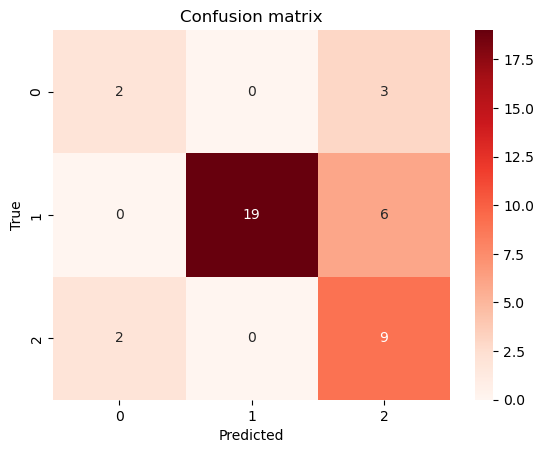

In [113]:
from sklearn.metrics import confusion_matrix
#Visualizamos resultados
confusion_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

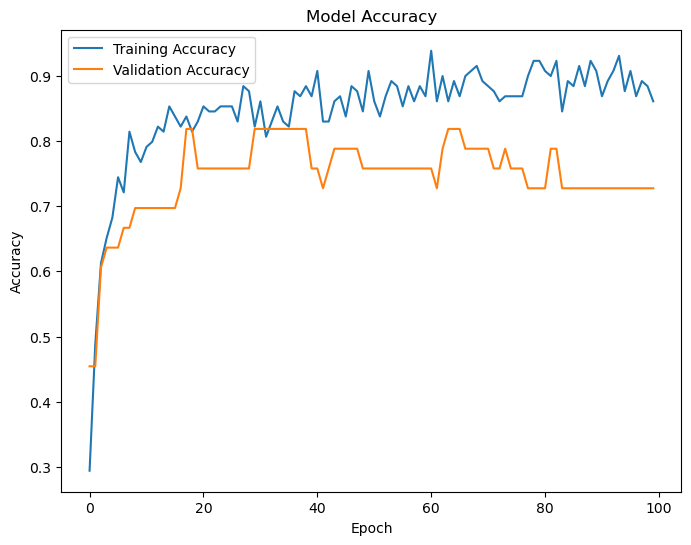

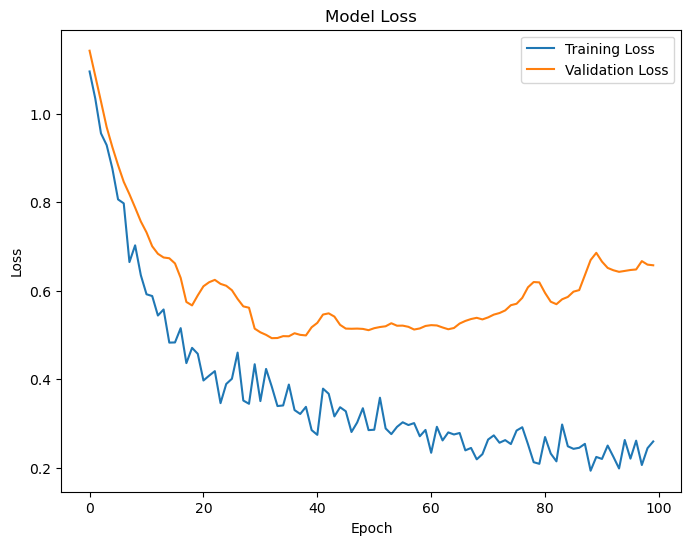

In [115]:
# Accuracy Plot
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

GRÁFICA DE PRECISIÓN

**Entrenamiento Vs validación:**
<ul>
    <li>La precisión de entrenamiento (linea azul) aumenta gradualmente hasta estabilizarse entorno al 80-85%.</li>
    <li>La precisión de validación (línea naranja) sigueuna tendencia similar, estabilizándpse en un nivel cercano alentrenamineto</li>
</ul>

**Indicadores de overfitting**
<ul>
    <li>No hay gran disparidad entre las curvas de entrenamiento y validación. Esto sugiere que el no modelo no está significativamente sobreajustado.</li>
    <li>La precisión en validación es ligeramente menor que en el entrenamiento, lo cual es normal</li>
</ul>
En conclusión: el modelo parece generalizar bien, dado que las precisiones de validación y entrenamiento están cerca. 





<p>GRÁFICA DE PÉRDIDA</p>

**Tendencia general**
<ul>
    <li>La pérdida de entrenamiento disminuye gradualmente y se estabiliza alrededor de 0.4</li>
    <li>La pérdida de validación también disminuye y converge a valores similares de entrenamiento.</li>
</ul>

**Indicadores overfitting**
<ul>
    <li>Las curvas son bastante cercanas, lo que indica que el modelo no está aprendiendo patrones específicos del entrenamiento, no hay evidencia clara de overfitting</li>
</ul>

In [118]:
model.save('mlp-modell.keras')

## MEJORA: INTRODUCCIÓN DE REGULARIZACIÓN EN DOS CAPAS PARA REDUCIR EL SOBREAJUSTE

In [121]:
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import SGD



model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer = l2(0.01)),
    Dropout(0.3),  # 30% dropout
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu'),
     Dense(y_train_categorical.shape[1], activation='softmax')
])

# Compiling the Model

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
history = model.fit(X_train_scaled, y_train_categorical,
                    epochs=200,
                    batch_size=16,
                    validation_split=0.2)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3967 - loss: 1.6819 - val_accuracy: 0.5152 - val_loss: 1.6790
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4488 - loss: 1.6482 - val_accuracy: 0.5152 - val_loss: 1.6754
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4323 - loss: 1.6409 - val_accuracy: 0.4848 - val_loss: 1.6718
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4423 - loss: 1.6306 - val_accuracy: 0.4545 - val_loss: 1.6663
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4878 - loss: 1.6335 - val_accuracy: 0.4545 - val_loss: 1.6622
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4005 - loss: 1.6627 - val_accuracy: 0.4545 - val_loss: 1.6585
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4380 - loss: 1.6522 - val_accuracy: 0.3939 - val_loss: 1.6551
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4320 - loss: 1.6430 - val_accuracy: 0.3939 - val_loss:

In [130]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7215 - loss: 1.2009
Test Accuracy: 70.73%


In [132]:
y_pred_prob = model.predict(X_test_scaled)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [134]:
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.77      0.92      0.84        25
         mid       0.55      0.55      0.55        11

    accuracy                           0.71        41
   macro avg       0.44      0.49      0.46        41
weighted avg       0.61      0.71      0.66        41



C:\Users\virginia.anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\virginia.anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\virginia.anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


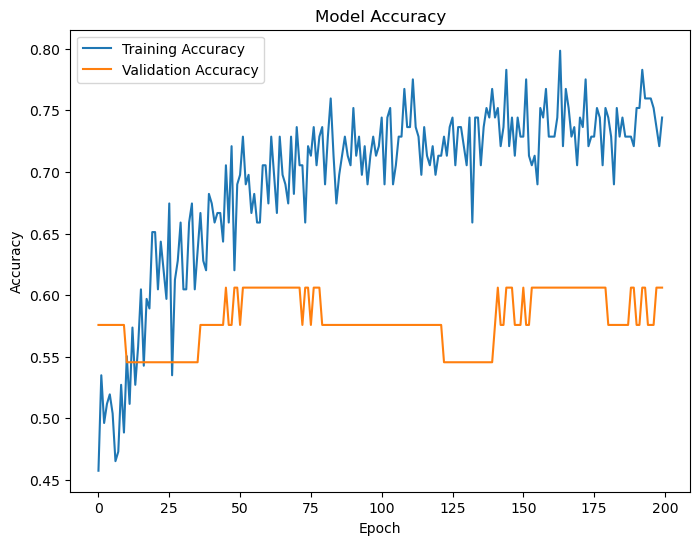

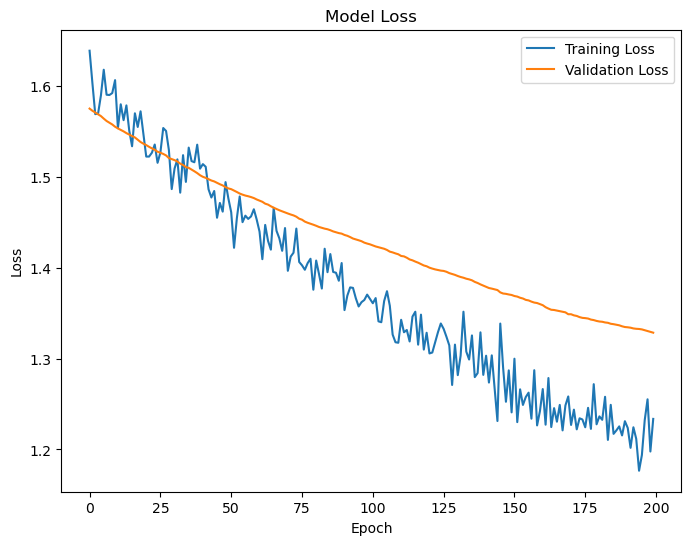

In [138]:
# Accuracy Plot
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [140]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Configuración del modelo MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Capas ocultas
    activation='relu',  # Función de activación
    solver='sgd',  # Optimizador: Stochastic Gradient Descent
    alpha=0.01,  # Regularización L2 (equivalente a kernel_regularizer)
    learning_rate_init=0.001,  # Tasa de aprendizaje inicial
    max_iter=500,  # Número máximo de iteraciones
    random_state=42
)



In [142]:
# Entrenamiento del modelo
mlp.fit(X_train_scaled, y_train_encoded)


C:\Users\virginia.anton\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(128, 64, 32), max_iter=500,
              random_state=42, solver='sgd')

In [143]:
# Predicciones
y_pred_encoded = mlp.predict(X_test_scaled)

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_encoded))

# Matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_encoded))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.95      0.84      0.89        25
           2       0.53      0.91      0.67        11

    accuracy                           0.76        41
   macro avg       0.49      0.58      0.52        41
weighted avg       0.72      0.76      0.72        41

Confusion Matrix:
[[ 0  0  5]
 [ 0 21  4]
 [ 0  1 10]]


C:\Users\virginia.anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\virginia.anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\virginia.anton\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


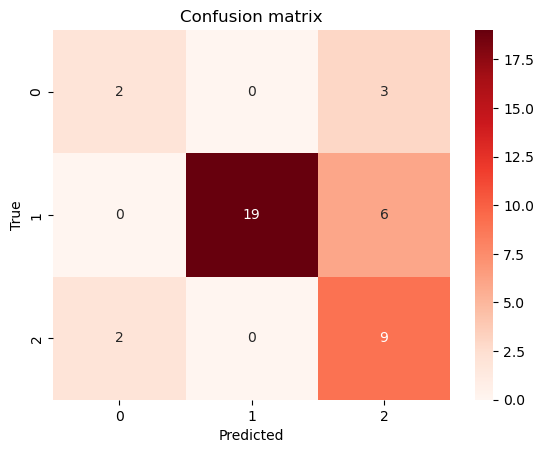

In [124]:
#Visualizamos resultados
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

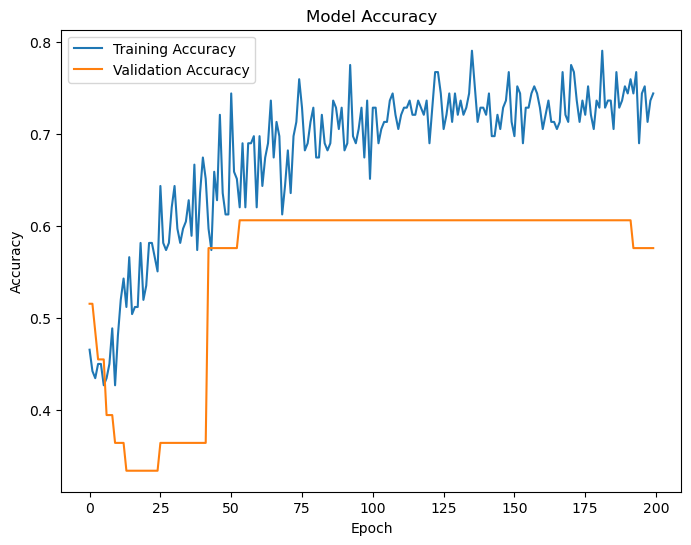

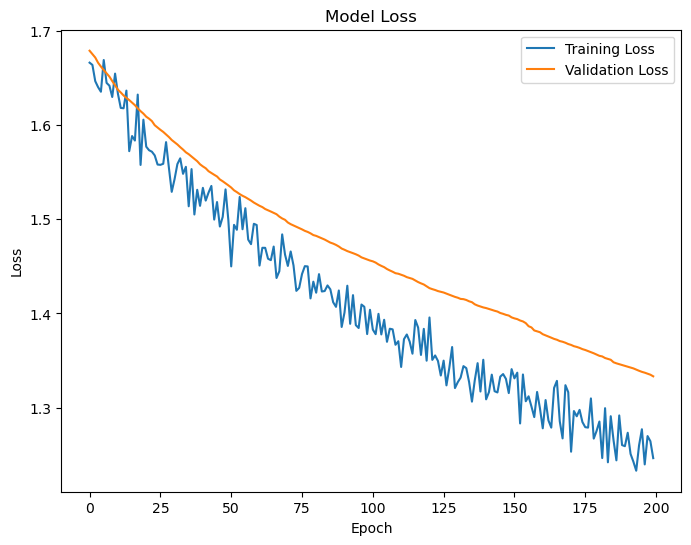

In [127]:
# Accuracy Plot
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Conclusion
### Gráfica de precisión 

<ol>
    <li>Modelo es inestable en la curva de precisión  de entrenamiento, teniendo dificultades para ajustarse a los datos, y pensamos que se debe al dropout y al regularizer, que se encargan de reducir el sobreajuste, y en este caso es excesivo. </li>
    <li>En la curva de validación, podemos observar que njo aprende bien por que la gráfica es constante hasta la época 125, cunado vemos un cambio abrupto; esto no es un comportamiento normal del modelo y puede deberse a un problema en el entrenamiento.</li>
</ol>

### Gráfica de pérdida
<ol>
    <li>En el entrenamiento la pérdida disminuye con fluctuaciones, lo que nos diceque el modelo aprende de manera inconsistente.</li>
    <li>En la curva de validación, la pérdida disminuye de forma muy lenta, y no refleja una mejora significativa durante el entrenamiento. </li>
</ol>

### Conclusiones de la selección del modelo
Vamos a usar el oyro modelo, ya que , aunque en el classification report aparezca que esta overfiited, en las gráficas de precisión y pérdida no aparece como sobrejajustado el modelo, y ya vemos que al meter la regularización metemos demasiado exceso de regularización, que elmodelo no es capaz de memorizar los datos. 

# PRUEBA EN DATOS WEARABLE

In [357]:
wearable = pd.read_csv('wearable-simulation-with-common-users.csv')
encounter = pd.read_csv('encounter-simulation-with-common-users.csv')

In [359]:
wearable.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year,date,week,trimester
0,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.696800,100.0,2024-06-16,2024-06,2024-06-16,3,First
1,user_0000,32,2024-06-16 10:45:05,87.0,130.0,8.33,98.711909,108.0,2024-06-16,2024-06,2024-06-16,3,First
2,user_0000,32,2024-06-16 18:45:05,87.0,130.0,8.33,98.711909,108.0,2024-06-16,2024-06,2024-06-16,3,First
3,user_0000,31,2024-06-18 07:37:54,87.0,133.0,8.86,98.843603,121.0,2024-06-18,2024-06,2024-06-18,3,First
4,user_0000,31,2024-06-18 15:37:54,86.0,131.0,7.99,98.870108,102.0,2024-06-18,2024-06,2024-06-18,3,First


Ahora tenemos que hacer coincidir las columnas del wearable con las que se entrenó el modelo: hay que incluirlas columnas de BMI y diabetes (si tiene o no diabetes) de los datos de encounter (visita al médico)

In [362]:
encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          8254 non-null   int64  
 1   user_id                                             8254 non-null   object 
 2   UNITS                                               8254 non-null   object 
 3   DATE                                                8254 non-null   object 
 4   BIRTHDATE                                           8254 non-null   object 
 5   GENDER                                              8254 non-null   object 
 6   RACE                                                8254 non-null   object 
 7   ETHNICITY                                           8254 non-null   object 
 8   Age                                                 8254 non-null   int64  
 9

In [364]:
encounter_selected = encounter[['wearable_user_id', 'Body mass index (BMI) [Ratio]', 'HAS_DIABETES']]
encounter_selected = encounter_selected.rename(columns = {'wearable_user_id': 'user_id'})
wearable_complete = pd.merge(wearable, encounter_selected, on='user_id', how = 'left')

In [366]:
wearable_complete.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year,date,week,trimester,Body mass index (BMI) [Ratio],HAS_DIABETES
0,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
1,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
2,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
3,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
4,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0


In [368]:
wearable_complete = wearable_complete.rename(columns = {'Body mass index (BMI) [Ratio]': 'BMI', 
                                                       'SystolicBP': 'Systolic BP', 
                                                       'DiastolicBP': 'Diastolic BP', 
                                                       'HAS_DIABETES': 'diabetes'})

In [370]:
wearable_complete.head()

,user_id,Age,timestamp,Diastolic BP,Systolic BP,BS,BodyTemp,HeartRate,day,month&year,date,week,trimester,BMI,diabetes
0,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
1,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
2,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
3,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0
4,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.6968,100.0,2024-06-16,2024-06,2024-06-16,3,First,29.1,0


## ESCALADO DE LOS DATOS
Vamos a escalar las variables: BMI, Systolic BP, Diastolic BP, Age. 

In [373]:
cols_to_scale = ['Age', 'Diastolic BP', 'Systolic BP', 'BMI']
wearable_scaled = wearable_complete.copy()


In [375]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wearable_scaled[cols_to_scale] = scaler.fit_transform(wearable_scaled[cols_to_scale])
print(wearable_scaled.head())

     user_id       Age            timestamp  Diastolic BP  Systolic BP    BS  \
0  user_0000  0.329675  2024-06-16 02:45:05      1.338706     1.435813  8.26   
1  user_0000  0.329675  2024-06-16 02:45:05      1.338706     1.435813  8.26   
2  user_0000  0.329675  2024-06-16 02:45:05      1.338706     1.435813  8.26   
3  user_0000  0.329675  2024-06-16 02:45:05      1.338706     1.435813  8.26   
4  user_0000  0.329675  2024-06-16 02:45:05      1.338706     1.435813  8.26   

   BodyTemp  HeartRate         day month&year        date  week trimester  \
0   98.6968      100.0  2024-06-16    2024-06  2024-06-16     3     First   
1   98.6968      100.0  2024-06-16    2024-06  2024-06-16     3     First   
2   98.6968      100.0  2024-06-16    2024-06  2024-06-16     3     First   
3   98.6968      100.0  2024-06-16    2024-06  2024-06-16     3     First   
4   98.6968      100.0  2024-06-16    2024-06  2024-06-16     3     First   

        BMI  diabetes  
0  0.854897         0  
1  0.854

## PREDICCIONES USANDO MODELO MLP ENTRENADO

In [383]:
model.save('mlp-model.h5')

In [387]:
model = load_model('mlp-model.h5')

In [389]:
from tensorflow.keras.models import load_model
import numpy as np
model = load_model('mlp-model.h5')

cols = ['Diastolic BP', 'Systolic BP', 'Age', 'BMI', 'diabetes']
X_scaled = wearable_scaled[cols].values
y_pred_prob=model.predict(X_scaled)
y_pred_encoded = np.argmax(y_pred_prob, axis=1) #etiquetas predichas

#decodificamos etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train_categorical.argmax(axis=1))  # Ajustar el encoder con las clases originales
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 5. Añadir las predicciones al dataset
wearable_scaled['Predicted_Class'] = y_pred

8645/8645 ━━━━━━━━━━━━━━━━━━━━ 8s 912us/step


In [393]:
print(wearable_scaled[['user_id', 'Predicted_Class']].head())

     user_id  Predicted_Class
0  user_0000                0
1  user_0000                0
2  user_0000                0
3  user_0000                0
4  user_0000                0


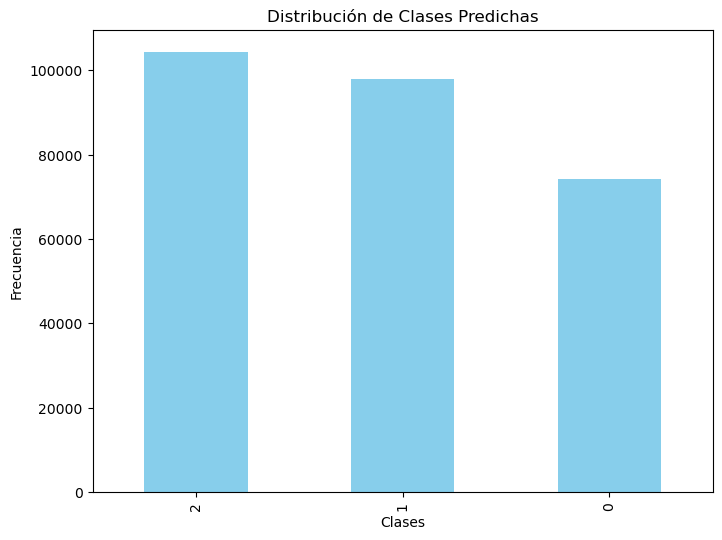

In [395]:
import matplotlib.pyplot as plt

pred_counts = wearable_scaled['Predicted_Class'].value_counts()
# Graficar la distribución
plt.figure(figsize=(8, 6))
pred_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases Predichas')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

In [399]:
wearable_scaled.to_csv('wearable_with_predictions.csv', index=False)

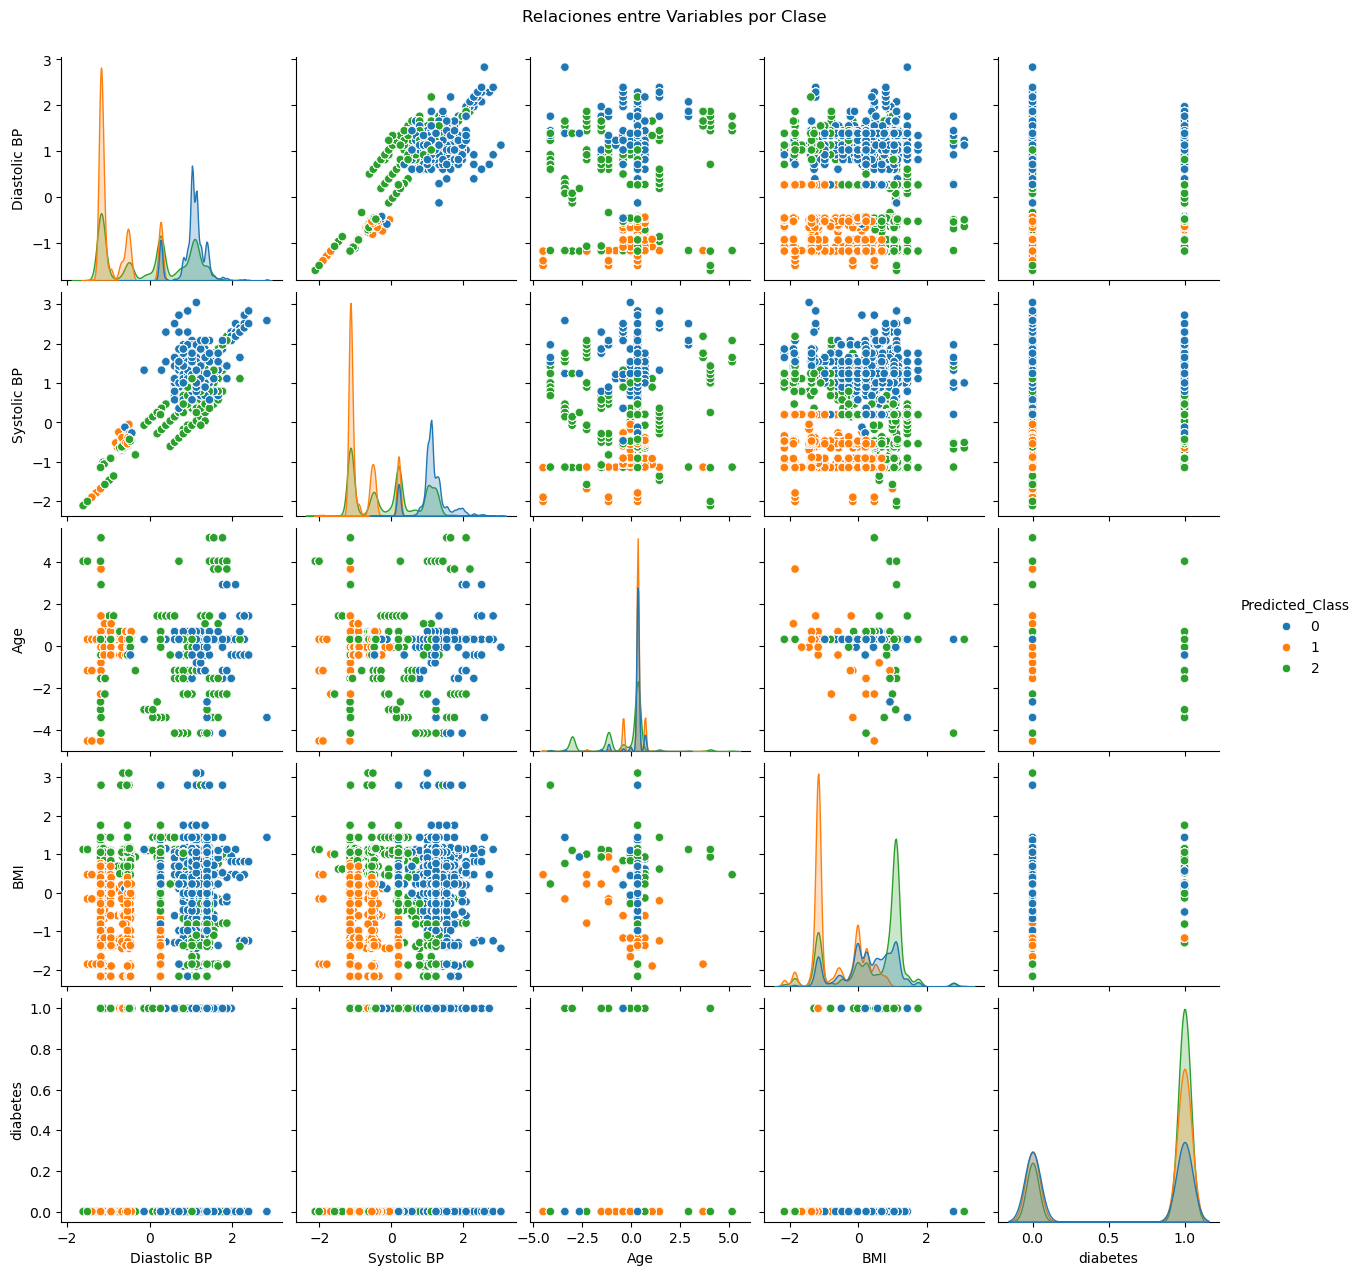

In [405]:
sns.pairplot(wearable_scaled, vars=cols, hue='Predicted_Class', palette='tab10', diag_kind='kde')
plt.suptitle('Relaciones entre Variables por Clase', y=1.02)
plt.show()

<ul>
    <li>Las variables como BMI y Systolic BPP parecen tener más clara separación entre clases. </li>
    <li>Existe una correlación positiva entre Diastolic BP y SystolicBP, cosa que nos esperábamos y vemos que el modelo ha capturado. </li>
    <li>BMI Vs Age: parece no haber una relación lineal clara , están bastante dispersas, aunque la clase 1 (mid risk) se presenta en valores más altos de BMI.</li>
    <li>Diabetes: parece que los cpacientes con diabetes, están asociads a valores más altos en variables como BMI y presión arterial. </li>
    <li> BMI: un BMI más elevado está relacionado con mayor riesgo a desarrollar preeclampsia</li>
    <li>Interacciones entre variables, al combinar presión alta, BMI elevado y diabetes, hay una fuerte relación para desarrollar preeclampsia. Aunque la edad es un factor que puede contribuir a esta combinación.</li>
    <li> Con este análisis, vemos que para prevenir la preeclampsia hay que monitorizar la presión arterial , el BMI y la diabetes.</li>
</ul>


# PRUEBA EN DATOS CONSULTA

In [413]:
encounter_aux = encounter.copy()

In [415]:
encounter_aux.head()

,Unnamed: 0,user_id,UNITS,DATE,BIRTHDATE,GENDER,RACE,ETHNICITY,Age,HAS_DIABETES,...,BS,Glucose [Mass/volume] in Serum or Plasma,Glucose [Mass/volume] in Urine by Test strip,Glucose [Presence] in Urine by Test strip,HeartRate,SystolicBP,common_id,wearable_user_id,visit_number,Adjusted_DATE
0,17523,006a3718-02e0-4eee-deb2-27735709da2d,cm,2015-01-31 19:16:48+00:00,1982-11-13,F,white,nonhispanic,32,1,...,4.93395,91.1,0.9,0.0,93.0,90.0,user_140,user_0047,1,2024-06-23
1,17524,006a3718-02e0-4eee-deb2-27735709da2d,kg,2015-01-31 19:16:48+00:00,1982-11-13,F,white,nonhispanic,32,1,...,4.93395,91.1,0.9,0.0,93.0,90.0,user_140,user_0047,2,2024-06-23
2,17525,006a3718-02e0-4eee-deb2-27735709da2d,kg/m2,2015-01-31 19:16:48+00:00,1982-11-13,F,white,nonhispanic,32,1,...,4.93395,91.1,0.9,0.0,93.0,90.0,user_140,user_0047,3,2024-06-23
3,17526,006a3718-02e0-4eee-deb2-27735709da2d,mm[Hg],2015-01-31 19:16:48+00:00,1982-11-13,F,white,nonhispanic,32,1,...,4.93395,91.1,0.9,0.0,93.0,90.0,user_140,user_0047,4,2024-06-23
4,17527,006a3718-02e0-4eee-deb2-27735709da2d,mm[Hg],2015-01-31 19:16:48+00:00,1982-11-13,F,white,nonhispanic,32,1,...,4.93395,91.1,0.9,0.0,93.0,90.0,user_140,user_0047,5,2024-06-23


In [417]:
encounter_aux = encounter_aux.rename(columns = {'Body mass index (BMI) [Ratio]': 'BMI', 
                                                       'SystolicBP': 'Systolic BP', 
                                                       'DiastolicBP': 'Diastolic BP', 
                                                       'HAS_DIABETES': 'diabetes'})

## ESCALADO DE DATOS

In [421]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'Diastolic BP', 'Systolic BP', 'BMI']
encounter_scaled = encounter_aux.copy()
scaler = StandardScaler()
encounter_scaled[cols_to_scale] = scaler.fit_transform(encounter_scaled[cols_to_scale])
print(encounter_scaled.head())

   Unnamed: 0                               user_id   UNITS  \
0       17523  006a3718-02e0-4eee-deb2-27735709da2d      cm   
1       17524  006a3718-02e0-4eee-deb2-27735709da2d      kg   
2       17525  006a3718-02e0-4eee-deb2-27735709da2d   kg/m2   
3       17526  006a3718-02e0-4eee-deb2-27735709da2d  mm[Hg]   
4       17527  006a3718-02e0-4eee-deb2-27735709da2d  mm[Hg]   

                        DATE   BIRTHDATE GENDER   RACE    ETHNICITY       Age  \
0  2015-01-31 19:16:48+00:00  1982-11-13      F  white  nonhispanic -0.496021   
1  2015-01-31 19:16:48+00:00  1982-11-13      F  white  nonhispanic -0.496021   
2  2015-01-31 19:16:48+00:00  1982-11-13      F  white  nonhispanic -0.496021   
3  2015-01-31 19:16:48+00:00  1982-11-13      F  white  nonhispanic -0.496021   
4  2015-01-31 19:16:48+00:00  1982-11-13      F  white  nonhispanic -0.496021   

   diabetes  ...       BS Glucose [Mass/volume] in Serum or Plasma  \
0         1  ...  4.93395                                     91

## PREDICCIONES USANDO MODELO

In [425]:
from tensorflow.keras.models import load_model
import numpy as np
model = load_model('mlp-model.h5')

cols = ['Diastolic BP', 'Systolic BP', 'Age', 'BMI', 'diabetes']
X_scaled = encounter_scaled[cols].values
y_pred_prob=model.predict(X_scaled)
y_pred_encoded = np.argmax(y_pred_prob, axis=1) #etiquetas predichas

#decodificamos etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train_categorical.argmax(axis=1))  # Ajustar el encoder con las clases originales
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 5. Añadir las predicciones al dataset
encounter_scaled['Predicted_Class'] = y_pred

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [427]:
print(encounter_scaled[['user_id', 'Predicted_Class']].head())

                                user_id  Predicted_Class
0  006a3718-02e0-4eee-deb2-27735709da2d                1
1  006a3718-02e0-4eee-deb2-27735709da2d                1
2  006a3718-02e0-4eee-deb2-27735709da2d                1
3  006a3718-02e0-4eee-deb2-27735709da2d                1
4  006a3718-02e0-4eee-deb2-27735709da2d                1


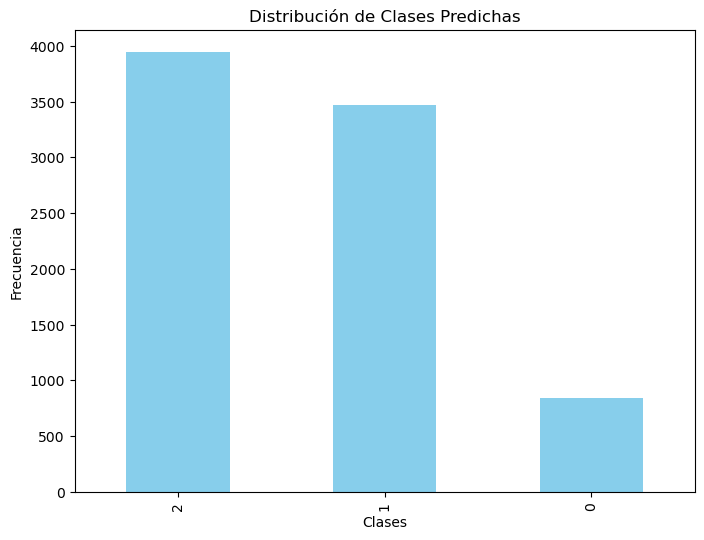

In [429]:
import matplotlib.pyplot as plt

pred_counts = encounter_scaled['Predicted_Class'].value_counts()
# Graficar la distribución
plt.figure(figsize=(8, 6))
pred_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases Predichas')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

In [431]:
encounter_scaled.to_csv('encounter_with_predictions.csv', index=False)

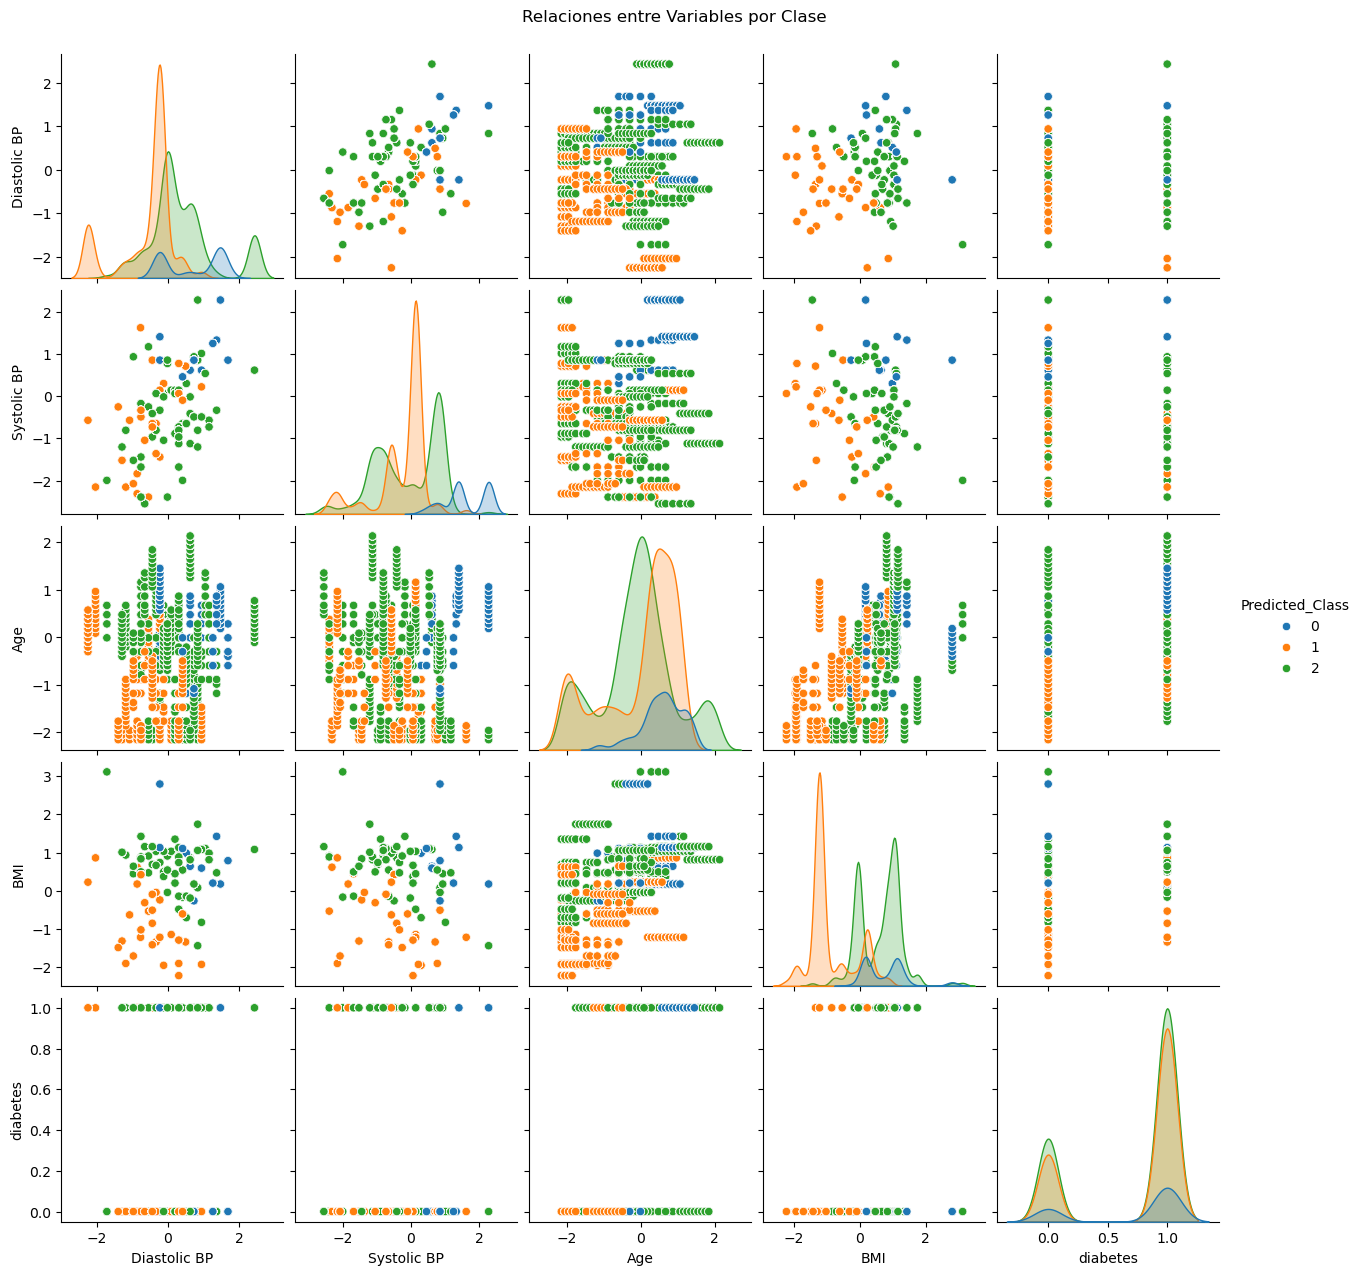

In [433]:
sns.pairplot(encounter_scaled, vars=cols, hue='Predicted_Class', palette='tab10', diag_kind='kde')
plt.suptitle('Relaciones entre Variables por Clase', y=1.02)
plt.show()

Podemos observar las mismas conclusiones que con eñ wearable, la presión arterial, tanto diastólica como sistólica es un factor de riesgo y que debe ser monitorizada. 

A su vez, pacientes con BMI elevado, están en mayor riesgo de preeclamspia, es evidente que las clases naranja y verde están en sus valores más añtos.

Finalemente, los pacientes tienen un mayor riesgo de clasificarse en las categorías de mayor riesgo cuando padecen diabetes. 

Todo esto nos lleva a pensar que el wearable si serviría para prevenir riesgos de preeclampsia. 

# NUEVOS DATOS CONSULTA CON SÓLO MUJERES EMBARAZADAS

In [555]:
encounterPregnant = pd.read_csv('preeclampsiaEncounter.csv')

In [557]:
encounterPregnant

,PATIENT,BMI,DBP,Hemoglobin,Protein Uria,SBP,Id,AGE,GestationalAge
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,86,15.0,13.198039,130,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49,0
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,72,13.0,13.198039,90,006a3718-02e0-4eee-deb2-27735709da2d,41,2
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,76,13.6,13.198039,114,01370617-7f62-f405-7b16-2cbc16b2e250,30,32
3,03644468-51a0-fdc3-6f7b-45fd0fbd49c0,27.7,73,15.0,13.198039,105,03644468-51a0-fdc3-6f7b-45fd0fbd49c0,16,0
4,06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197,29.8,78,15.0,13.198039,126,06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197,41,6
...,...,...,...,...,...,...,...,...,...
201,f9b1f03d-84bb-d46d-a930-85f418055c12,28.3,68,11.6,13.198039,101,f9b1f03d-84bb-d46d-a930-85f418055c12,37,18
202,faa32210-cefe-9df6-bac3-ba195e4d7247,27.9,102,12.2,13.198039,142,faa32210-cefe-9df6-bac3-ba195e4d7247,46,19
203,fae833df-dd9f-4f5c-7ce2-e4ceffde1d02,23.2,81,12.9,13.198039,119,fae833df-dd9f-4f5c-7ce2-e4ceffde1d02,31,19
204,fd67c5ed-a86f-c1d5-572a-88c1b973d6a9,27.7,102,13.7,13.198039,136,fd67c5ed-a86f-c1d5-572a-88c1b973d6a9,42,19


In [559]:
encounterPregnant = encounterPregnant.rename(columns = { 'AGE': 'Age',
                                                       'SBP': 'Systolic BP', 
                                                       'DBP': 'Diastolic BP'})

### ESCALADO DE DATOS

In [562]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'Diastolic BP', 'Systolic BP', 'BMI', 'Hemoglobin', 'Protein Uria']
encounterPregnant_scaled= encounterPregnant.copy()
scaler = StandardScaler()
encounterPregnant_scaled[cols_to_scale] = scaler.fit_transform(encounterPregnant_scaled[cols_to_scale])
print(encounterPregnant_scaled.head())

                                PATIENT       BMI  Diastolic BP  Hemoglobin  \
0  0037c68d-bbf3-0ce6-7fec-fa670bf7b996  0.635677      0.612790    0.867032   
1  006a3718-02e0-4eee-deb2-27735709da2d -0.500009     -0.906803   -0.886612   
2  01370617-7f62-f405-7b16-2cbc16b2e250 -0.302498     -0.472633   -0.360518   
3  03644468-51a0-fdc3-6f7b-45fd0fbd49c0  0.536922     -0.798260    0.867032   
4  06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197  1.055387     -0.255549    0.867032   

   Protein Uria  Systolic BP                                    Id       Age  \
0           0.0     0.618123  0037c68d-bbf3-0ce6-7fec-fa670bf7b996  1.361065   
1           0.0    -2.041582  006a3718-02e0-4eee-deb2-27735709da2d  0.619321   
2           0.0    -0.445759  01370617-7f62-f405-7b16-2cbc16b2e250 -0.400578   
3           0.0    -1.044193  03644468-51a0-fdc3-6f7b-45fd0fbd49c0 -1.698631   
4           0.0     0.352153  06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197  0.619321   

   GestationalAge  
0               0  
1   

### PREDICCIONES USANDO MODELO

In [565]:
from tensorflow.keras.models import load_model
import numpy as np
model = load_model('mlp-modell.keras')

cols = ['Diastolic BP', 'Systolic BP', 'Age', 'BMI', 'Hemoglobin', 'Protein Uria' ]
X_scaled = encounterPregnant_scaled[cols].values
y_pred_prob=model.predict(X_scaled)
y_pred_encoded = np.argmax(y_pred_prob, axis=1) #etiquetas predichas

#decodificamos etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train_categorical.argmax(axis=1))  # Ajustar el encoder con las clases originales
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 5. Añadir las predicciones al dataset
encounterPregnant['Predicted_Class'] = y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [567]:
encounterPregnant

,PATIENT,BMI,Diastolic BP,Hemoglobin,Protein Uria,Systolic BP,Id,Age,GestationalAge,Predicted_Class
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,86,15.0,13.198039,130,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49,0,2
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,72,13.0,13.198039,90,006a3718-02e0-4eee-deb2-27735709da2d,41,2,2
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,76,13.6,13.198039,114,01370617-7f62-f405-7b16-2cbc16b2e250,30,32,1
3,03644468-51a0-fdc3-6f7b-45fd0fbd49c0,27.7,73,15.0,13.198039,105,03644468-51a0-fdc3-6f7b-45fd0fbd49c0,16,0,1
4,06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197,29.8,78,15.0,13.198039,126,06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197,41,6,2
...,...,...,...,...,...,...,...,...,...,...
201,f9b1f03d-84bb-d46d-a930-85f418055c12,28.3,68,11.6,13.198039,101,f9b1f03d-84bb-d46d-a930-85f418055c12,37,18,2
202,faa32210-cefe-9df6-bac3-ba195e4d7247,27.9,102,12.2,13.198039,142,faa32210-cefe-9df6-bac3-ba195e4d7247,46,19,2
203,fae833df-dd9f-4f5c-7ce2-e4ceffde1d02,23.2,81,12.9,13.198039,119,fae833df-dd9f-4f5c-7ce2-e4ceffde1d02,31,19,1
204,fd67c5ed-a86f-c1d5-572a-88c1b973d6a9,27.7,102,13.7,13.198039,136,fd67c5ed-a86f-c1d5-572a-88c1b973d6a9,42,19,0


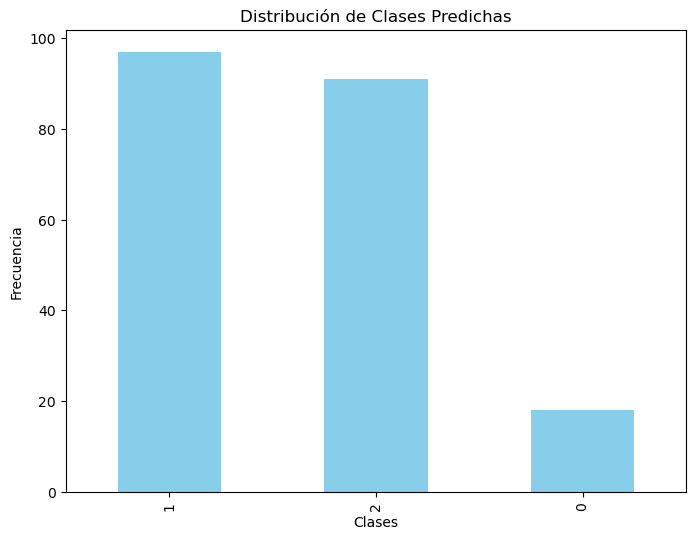

In [570]:
import matplotlib.pyplot as plt

pred_counts = encounterPregnant['Predicted_Class'].value_counts()
# Graficar la distribución
plt.figure(figsize=(8, 6))
pred_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases Predichas')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

In [572]:
encounterPregnant.to_csv('encounterPregnant_with_predictions.csv', index=False)

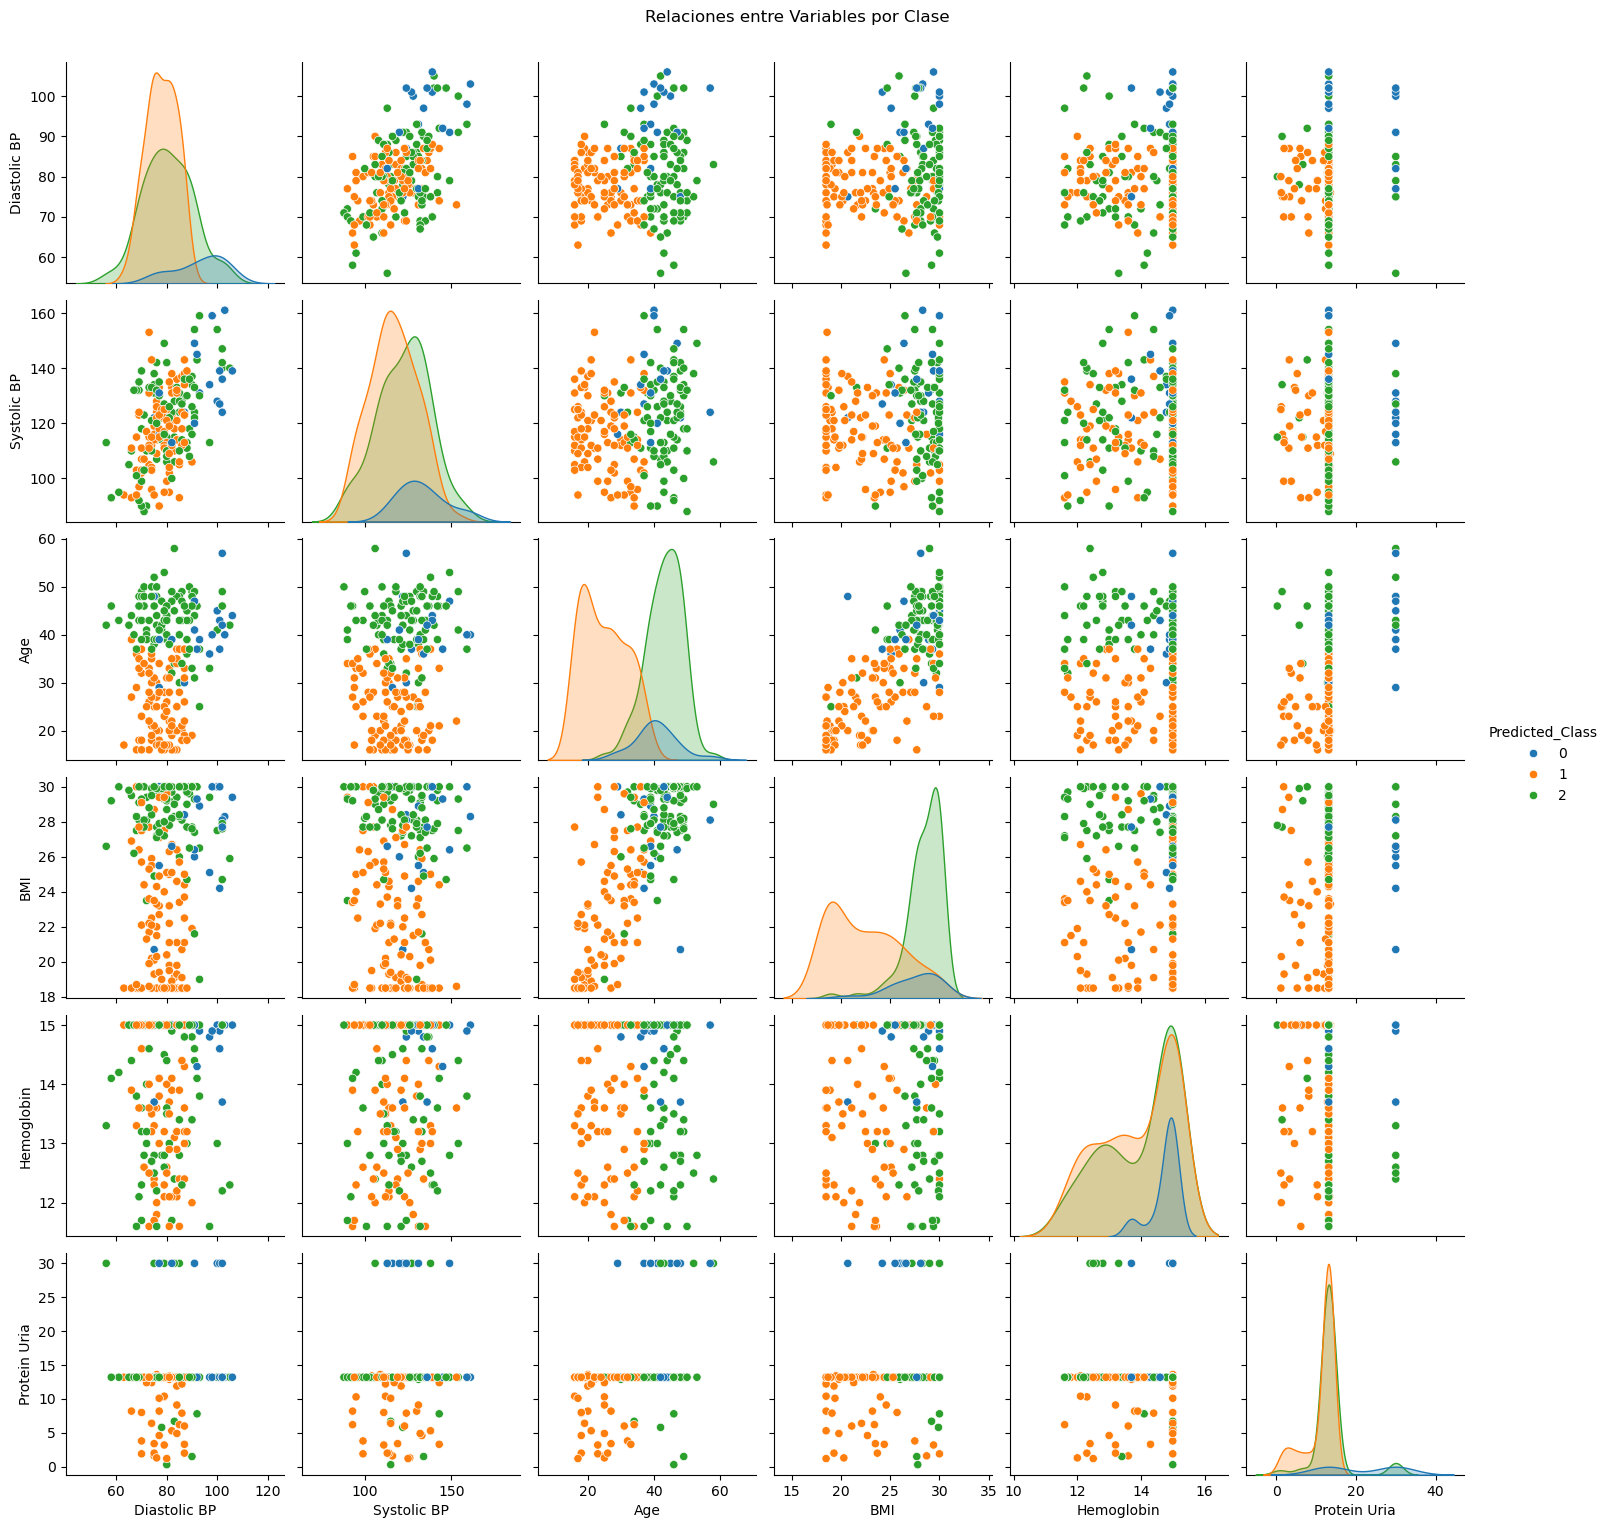

In [574]:
sns.pairplot(encounterPregnant, vars=cols, hue='Predicted_Class', palette='tab10', diag_kind='kde')
plt.suptitle('Relaciones entre Variables por Clase', y=1.02)
plt.show()

# PRUEBA CASO LÍMITE CONSULTA: PACIENTES YA DIAGNOSTICADAS CON HIPERTENSIÓN 

In [576]:
hypertensivePatients = pd.read_csv('preeclampsiahypertensivePatients.csv')

In [578]:
hypertensivePatients

,PATIENT,BMI,DBP,Hemoglobin,Protein Uria,SBP,Id,AGE
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,90,14.0,88.622642,140,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49
1,006a3718-02e0-4eee-deb2-27735709da2d,25.0,90,13.0,88.622642,140,006a3718-02e0-4eee-deb2-27735709da2d,41
2,01370617-7f62-f405-7b16-2cbc16b2e250,25.0,90,13.6,88.622642,140,01370617-7f62-f405-7b16-2cbc16b2e250,30
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,90,11.8,88.622642,140,0208384d-4316-4c11-0ffe-f0e13bca4417,52
4,0213db26-5738-14f0-4dc5-9e5be598241c,25.0,90,14.0,189.100000,140,0213db26-5738-14f0-4dc5-9e5be598241c,50
...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,90,12.9,88.622642,140,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,55
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,90,14.0,88.622642,140,fe026ae0-a34c-5399-b6d1-129d573de9f7,55
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,90,14.0,300.400000,140,fe431a7e-d7fc-03da-38c9-305889835377,55
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,90,12.5,88.622642,140,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32


In [592]:
hypertensivePatients = hypertensivePatients.rename(columns = {      'SBP': 'Systolic BP', 
                                                       'DBP': 'Diastolic BP', 
                                                       'AGE': 'Age'})

### ESCALADO DE DATOS

In [595]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'Diastolic BP', 'Systolic BP', 'BMI', 'Hemoglobin', 'Protein Uria']
hypertensivePatients_scaled = hypertensivePatients.copy()
scaler = StandardScaler()
hypertensivePatients_scaled[cols_to_scale] = scaler.fit_transform(hypertensivePatients_scaled[cols_to_scale])
print(hypertensivePatients_scaled.head())

                                PATIENT       BMI  Diastolic BP  Hemoglobin  \
0  0037c68d-bbf3-0ce6-7fec-fa670bf7b996  0.180549     -0.295676    0.626939   
1  006a3718-02e0-4eee-deb2-27735709da2d -0.916553     -0.295676   -0.583702   
2  01370617-7f62-f405-7b16-2cbc16b2e250 -0.916553     -0.295676    0.142683   
3  0208384d-4316-4c11-0ffe-f0e13bca4417  0.215940     -0.295676   -2.036470   
4  0213db26-5738-14f0-4dc5-9e5be598241c -0.916553     -0.295676    0.626939   

   Protein Uria  Systolic BP                                    Id       Age  
0      0.000000    -0.229455  0037c68d-bbf3-0ce6-7fec-fa670bf7b996  0.510828  
1      0.000000    -0.229455  006a3718-02e0-4eee-deb2-27735709da2d -0.110530  
2      0.000000    -0.229455  01370617-7f62-f405-7b16-2cbc16b2e250 -0.964898  
3      0.000000    -0.229455  0208384d-4316-4c11-0ffe-f0e13bca4417  0.743838  
4      1.645779    -0.229455  0213db26-5738-14f0-4dc5-9e5be598241c  0.588498  


## PREDICCIONES

In [597]:

from tensorflow.keras.models import load_model
import numpy as np
model = load_model('mlp-modell.keras')


cols = ['Diastolic BP', 'Systolic BP', 'Age', 'BMI', 'Hemoglobin', 'Protein Uria' ]
X_scaled = hypertensivePatients[cols].values
y_pred_prob=model.predict(X_scaled)
y_pred_encoded = np.argmax(y_pred_prob, axis=1) #etiquetas predichas

#decodificamos etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train_categorical.argmax(axis=1))  # Ajustar el encoder con las clases originales
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 5. Añadir las predicciones al dataset
hypertensivePatients['Predicted_Class'] = y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [601]:
hypertensivePatients

,PATIENT,BMI,Diastolic BP,Hemoglobin,Protein Uria,Systolic BP,Id,Age,Predicted_Class
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,90,14.0,88.622642,140,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49,0
1,006a3718-02e0-4eee-deb2-27735709da2d,25.0,90,13.0,88.622642,140,006a3718-02e0-4eee-deb2-27735709da2d,41,0
2,01370617-7f62-f405-7b16-2cbc16b2e250,25.0,90,13.6,88.622642,140,01370617-7f62-f405-7b16-2cbc16b2e250,30,0
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,90,11.8,88.622642,140,0208384d-4316-4c11-0ffe-f0e13bca4417,52,0
4,0213db26-5738-14f0-4dc5-9e5be598241c,25.0,90,14.0,189.100000,140,0213db26-5738-14f0-4dc5-9e5be598241c,50,0
...,...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,90,12.9,88.622642,140,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,55,0
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,90,14.0,88.622642,140,fe026ae0-a34c-5399-b6d1-129d573de9f7,55,0
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,90,14.0,300.400000,140,fe431a7e-d7fc-03da-38c9-305889835377,55,0
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,90,12.5,88.622642,140,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32,0


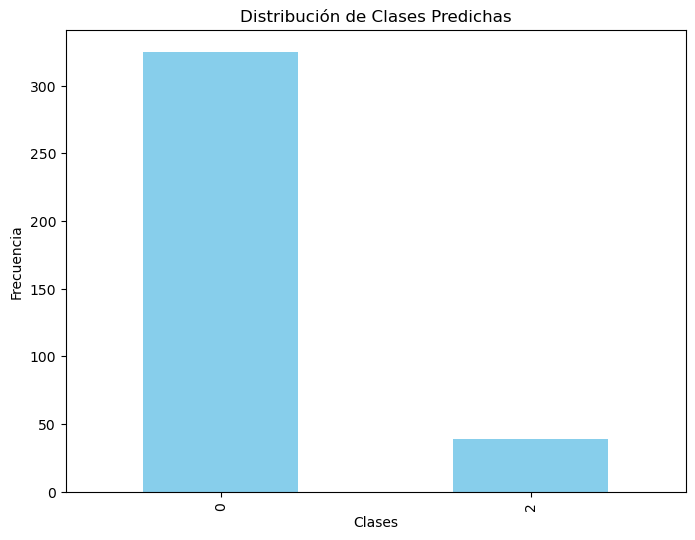

In [603]:
import matplotlib.pyplot as plt

pred_counts = hypertensivePatients['Predicted_Class'].value_counts()
# Graficar la distribución
plt.figure(figsize=(8, 6))
pred_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases Predichas')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

La clase 0 corresponde a la etiqueta mid risk, y la clase 2 corresponde a high risk. Si son mujeres en tratamiento cabe esperar que tengan high risk. No nos queda muy claro si esto se debe a que las características de la muestra, por estar en tratamiento bajan el riesgo o por que el algoritmo no lo detecta bien. Es por ello que vamos a generar un dataset artificial con unos dats muy límites para comprobarlo. 

In [605]:
hypertensivePatients.to_csv('hypertensivePatients_with_predictions.csv', index=False)

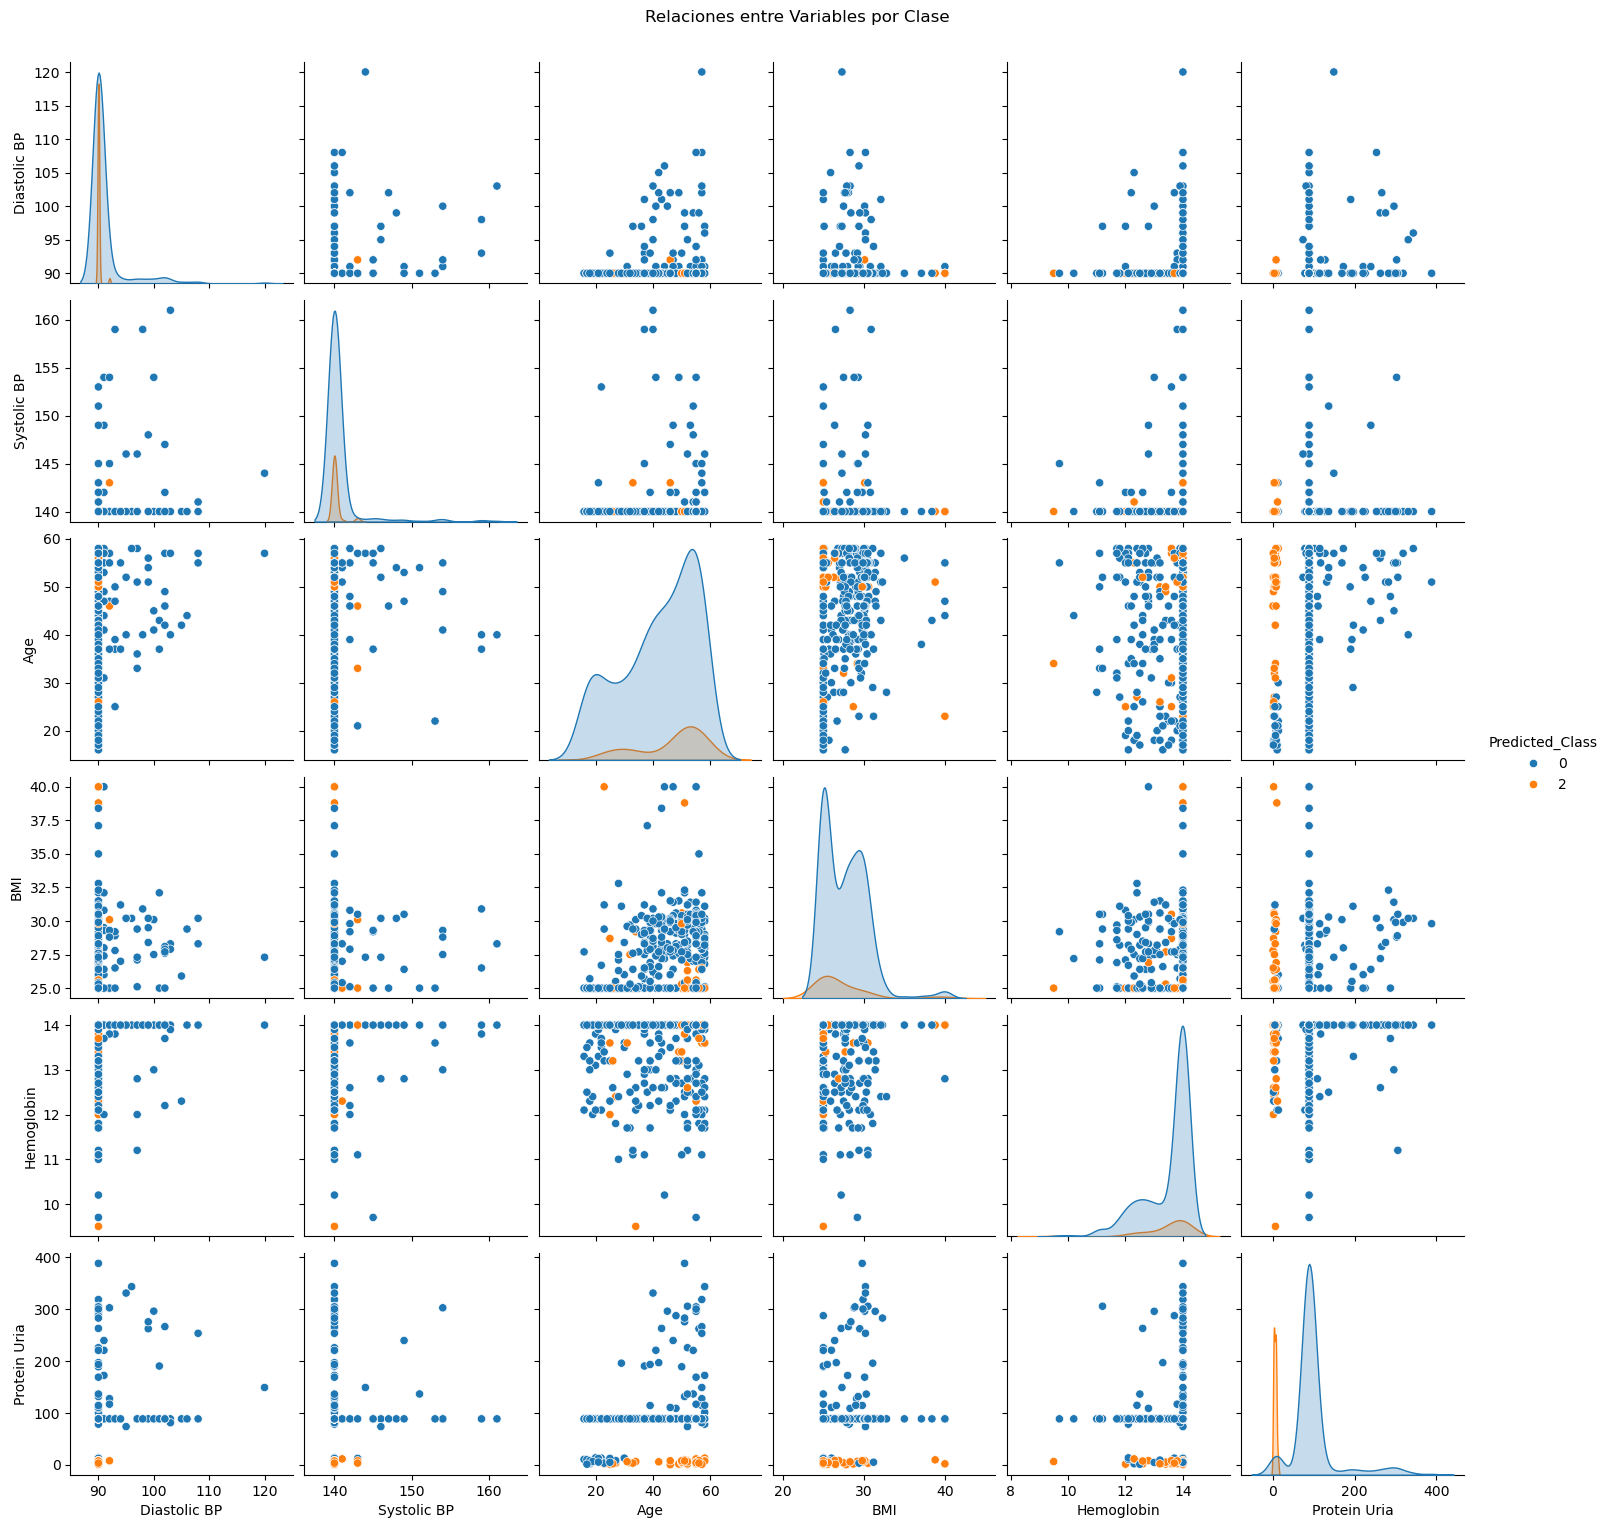

In [607]:
sns.pairplot(hypertensivePatients, vars=cols, hue='Predicted_Class', palette='tab10', diag_kind='kde')
plt.suptitle('Relaciones entre Variables por Clase', y=1.02)
plt.show()

Este pairplot muestra las relaciones entre variables fisiológicas relevantes para la evaluación del riesgo de preeclampsia en mujeres embarazdaas en tratamiento de hipertensión. Además, las muestras están coloreadas según la clase predicha por el algoritmo: 
<ul>
    <li>Eiqueta 0: Corresponde a la clase de Mid risk o riesgo moderado, y son las muestras en azul.</li>
    <li>Etiqueta 2: Corresponde a la clase High Risk o riesgo alto y son las muestras en naranja. </li>
</ul>
<h2>Interpretación de los resultados:</h2>
    <h3>Distribución de las variables:</h3>
        <p>Se observan distribuciones sesgadas en variables como Protein Uria y Presión sistólica arterial, que sugiere que son factores determinantes.En cambio, BMI y la edad tienen distribuciones más dispersas, no siendo muy determinantes.</p>
    <h3>Relaciones entre variables:</h3>
        <P>Protein Uria Vs Diastolic BP / Sys BP: valores altos de protein uria están relacionados con la clase 2, lo que es consistente con la literatura médica, ya que la protein uria es un marcador clave de preeclamspia.La presión arterial sistólica tiene un patrón de mayor densidad en la clase 2. </P>
        <p>Hemoglobin VS BMI / Age: hay una leve tendencia donde mujeres con hemoglobina más baja y un IMC más ato se clasifica con un riesgo alto. Pero no se como una separación tán marcada como  en las anteriores variables. </p>

        
    

# PRUEBA CON DATASET ARTIFICIAL DE MUJERES CON UNA HIPERTENSIÓN CRÍTICA

In [613]:
extremePatients = pd.read_csv('hypertensive_preeclampsia_patients.csv')

In [615]:
extremePatients

,PATIENT,BMI,Diastolic_BP,Hemoglobin_Level,Protein_Uria,Systolic_BP,Id,Age
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,115,10.0,89.622642,170,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49
1,006a3718-02e0-4eee-deb2-27735709da2d,25.0,115,10.0,89.622642,170,006a3718-02e0-4eee-deb2-27735709da2d,41
2,01370617-7f62-f405-7b16-2cbc16b2e250,25.0,115,10.0,89.622642,170,01370617-7f62-f405-7b16-2cbc16b2e250,30
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,115,10.0,89.622642,170,0208384d-4316-4c11-0ffe-f0e13bca4417,52
4,0213db26-5738-14f0-4dc5-9e5be598241c,25.0,115,10.0,190.100000,170,0213db26-5738-14f0-4dc5-9e5be598241c,50
...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,115,10.0,89.622642,170,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,55
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,115,10.0,89.622642,170,fe026ae0-a34c-5399-b6d1-129d573de9f7,55
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,115,10.0,301.400000,170,fe431a7e-d7fc-03da-38c9-305889835377,55
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,115,10.0,89.622642,170,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32


In [617]:
extremePatients = extremePatients.rename(columns = {      'Systolic_BP': 'Systolic BP', 
                                                       'Diastolic_BP': 'Diastolic BP', 
                                                       'Hemoglobin_Level': 'Hemoglobin', 
                                                   'Protein_Uria': 'Protein Uria'})

### ESCALADO DE DATOS

In [620]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'Diastolic BP', 'Systolic BP', 'BMI', 'Hemoglobin', 'Protein Uria']
extremePatients_scaled = extremePatients.copy()
scaler = StandardScaler()
extremePatients_scaled[cols_to_scale] = scaler.fit_transform(extremePatients_scaled[cols_to_scale])
print(extremePatients_scaled.head())

                                PATIENT       BMI  Diastolic BP  Hemoglobin  \
0  0037c68d-bbf3-0ce6-7fec-fa670bf7b996  0.180549     -0.052486    0.072098   
1  006a3718-02e0-4eee-deb2-27735709da2d -0.916553     -0.052486    0.072098   
2  01370617-7f62-f405-7b16-2cbc16b2e250 -0.916553     -0.052486    0.072098   
3  0208384d-4316-4c11-0ffe-f0e13bca4417  0.215940     -0.052486    0.072098   
4  0213db26-5738-14f0-4dc5-9e5be598241c -0.916553     -0.052486    0.072098   

   Protein Uria  Systolic BP                                    Id       Age  
0     -0.000315    -0.052486  0037c68d-bbf3-0ce6-7fec-fa670bf7b996  0.510828  
1     -0.000315    -0.052486  006a3718-02e0-4eee-deb2-27735709da2d -0.110530  
2     -0.000315    -0.052486  01370617-7f62-f405-7b16-2cbc16b2e250 -0.964898  
3     -0.000315    -0.052486  0208384d-4316-4c11-0ffe-f0e13bca4417  0.743838  
4      1.646205    -0.052486  0213db26-5738-14f0-4dc5-9e5be598241c  0.588498  


## PREDICCIONES

In [624]:

from tensorflow.keras.models import load_model
import numpy as np
model = load_model('mlp-modell.keras')


cols = ['Diastolic BP', 'Systolic BP', 'Age', 'BMI', 'Hemoglobin', 'Protein Uria' ]
X_scaled = extremePatients_scaled[cols].values
y_pred_prob=model.predict(X_scaled)
y_pred_encoded = np.argmax(y_pred_prob, axis=1) #etiquetas predichas

#decodificamos etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train_categorical.argmax(axis=1))  # Ajustar el encoder con las clases originales
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 5. Añadir las predicciones al dataset
extremePatients['Predicted_Class'] = y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [628]:
extremePatients

,PATIENT,BMI,Diastolic BP,Hemoglobin,Protein Uria,Systolic BP,Id,Age,Predicted_Class
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,115,10.0,89.622642,170,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49,2
1,006a3718-02e0-4eee-deb2-27735709da2d,25.0,115,10.0,89.622642,170,006a3718-02e0-4eee-deb2-27735709da2d,41,1
2,01370617-7f62-f405-7b16-2cbc16b2e250,25.0,115,10.0,89.622642,170,01370617-7f62-f405-7b16-2cbc16b2e250,30,1
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,115,10.0,89.622642,170,0208384d-4316-4c11-0ffe-f0e13bca4417,52,2
4,0213db26-5738-14f0-4dc5-9e5be598241c,25.0,115,10.0,190.100000,170,0213db26-5738-14f0-4dc5-9e5be598241c,50,0
...,...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,115,10.0,89.622642,170,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,55,2
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,115,10.0,89.622642,170,fe026ae0-a34c-5399-b6d1-129d573de9f7,55,2
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,115,10.0,301.400000,170,fe431a7e-d7fc-03da-38c9-305889835377,55,0
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,115,10.0,89.622642,170,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32,1


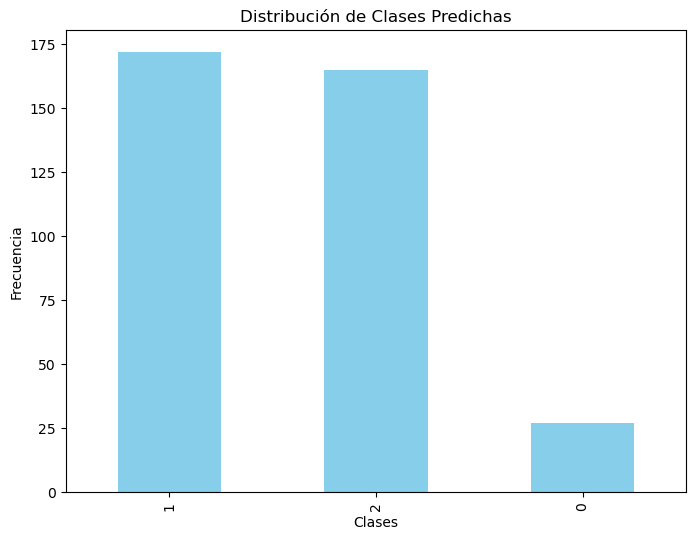

In [630]:
import matplotlib.pyplot as plt

pred_counts = extremePatients['Predicted_Class'].value_counts()
# Graficar la distribución
plt.figure(figsize=(8, 6))
pred_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases Predichas')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

In [637]:
extremePatients.to_csv('extremePatients_with_predictions.csv', index=False)

En personas con preeclampsia o tratamiento para hipertensión crítica vemos que el número de personas con riesgo es mayor, sin embargo, aún vemos que la clase de riesgo moderado es alta, con lo que el modelo no lo distingue bien del todo de la clase de riesgo alto. Es por ello que nos hace pensar o que se necesitan más parámetros para que se pueda clasificar correctamente o en conjunto al resultado del wearable. 